<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<font size= 30>
Reconocimento de las emociones en la voz  

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

<font size= 15>
Esther Pérez Serrajordi

<br>

<font size= 5>
Trábajo Final del Máster Big Data y Data science. Aplicaciones al comercio, empresa y finanzas 2021/2022 - versión online  Trábajo Final del Máster Big Data y Data science. Aplicaciones al comercio, empresa y finanzas 2021/2022 - versión online  

<br>

<br>

<font size= 10>
<b> Índice

<font size= 5>
<ul><li>Introducción y objetivos</li>
    <br>
    <br>
    <li>Metodología</li>
    <br>
    <br>
    <li>Desarrollo</li>
    <br>
    <br>
    <li>Conclusiones</li>
    <br>
    <br>
    <li>Bibliografía</li>
    <br>
    <br>
    <li>Anexo</li>
    <br>
</ul>

<br>

<br>

<br>

<br>

# Introducción y objetivos

<font size= '3'>
El proyecto se basa en el análisis de varios <i>datasets</i> de audio para conseguir identificar, mediante la voz del interlocutor, que emoción está expresando en ese instante. Así, una vez creado un modelo que permita introducir nuevos datos e identifique la emoción del nuevo interlocutor, podremos vincularlo a futuro con una aplicación de música (Spotify, Apple Music, Amazon Music, etc.) que reproduzca canciones según el estado de ánimo del usuario.
    
La idea me surgió intentando poner música en Spotify y pensé: “Porque no podría pedirle música a la app y que pusiera algo según mi ánimo del momento”. De ahí empecé a investigar y descubrí que generando un modelo de reconocimiento de voz que identifique el estado de ánimo del usuario se podría vincular mediante una API de Spotify y reproducir canciones vinculadas a ese estado. Esta parte no se encontrará en el modelo dado que no dispongo de los conocimientos de desarrollo de aplicaciones para generarlo, pero la idea final es conseguirlo.

<br>

<br>

<br>

# Metodología

<font size= '3'>
Para este proyecto se ha utilizado Inteligencia Artificial, una rama de las ciencias de la computación que consiste en generar reglas para poder crear modelos predictivos sobre los datos que se analizan. Esta rama evolucionó y creó el Machine Learning, donde el modelado no necesitaba tener reglas preprogramadas para generar el mejor modelo para predecir datos, sino que se basa en aprender y mejorar en función de la experiencia de los datos. Con el paso del tiempo, esto también evolucionó en algoritmos más potentes y complejos generando las redes neuronales artificiales y así el Deep Learning, que es el método utilizado para el analisis de los datasets de audio del proyecto.
<br>
<br>
La estructura utilizada para el análisis de los datos y creación del mejor modelo predictivo ha sido el siguiente:
<br>
    <ul><li>Exploración de los datos (EDA): Analizar como son los datos y hacer las modificaciones necesarias.</li>
    <br>
    <li>Preprocesado de datos:
    <br>
    <br><ul><li>Unir los datasets</li>
    <br><li>Extraer las características necesarias (feature enginerins)</li>
    <br><li>Separar train - test</li></ul>
    <br>
    <li>Modelado con redes neuronales convolucionales (CNN)<br>
<br>
Como se analizan audios, la mejor forma de analizarlos es extraer las características a través de espectogramas que generan imágenes especificas para cada audio. Por esto, para el modelado se ha utilizado CNN, este tipo de redes neuronales se caracterizan por analizar las imágenes y formas por capas y de esta forma poder aprender y generar los mejores algoritmos para el modelo final. 

<br>

<br>

<br>

# Desarrollo

<font size= '3'>
Para iniciar el proyecto, lo primero fue descargar los datos necesarios. En este caso, utilizamos tres <i>datasets</i>:
    <br>
    <ul><li> Ravdess: 1440 archivos compuestos por 60 audios por 24 actores, 12 hombre y 12 mujeres.</li>
        <br><li> Savee: 480 archivos compuestos por 120 audios por 4 actores. </li>
        <br><li> Tess: 2800 archivos compuestos por 1400 audios por 2 actrices.</li>
    </ul>
    <br>
Las emociones que se expresan en los tres <i>datasets</i> son:
    <br>
    <ul><li>Neutral </li>
        <li>Calm  </li>
        <li>Happy </li>
        <li>Sad </li>
        <li>Angry </li>
        <li>Fearful </li>
        <li>Disgust </li>
        <li>Surprised </li>
    </ul>
    <br>
Como son datos bastante pesados y van a requerir una cantidad importante de recursos a nivel de sistema operativo, en vez de utilizar el programa jupyter en un entorno local, utilizamos el aplicativo Google Colab. Para ello, lo primero fue vincular el notebook a Google Drive donde se guardaron todos los datos.

In [1]:
import os
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
main_path = '/gdrive/MyDrive/TFM/'
RAV = os.path.join(main_path, 'RAVDESS/')
SAVEE = os.path.join(main_path, 'SAVEE/')
TESS = os.path.join(main_path, 'TESS/')

<font size= '3'>
    Posteriormente se cargaron todas las librerías que necesitamos que se pueden ver en el Anexo-

<font size= '3'>
Para empezar, lo primero es analizar los datos que hemos descargado utilizando EDA (Exploratory Data Analysis).  
<br>

En los tres <i>datasets</i> los nombres de los archivos nos indican las emociones que expresan cada actor. Por tanto, para cada uno de ellos tendremos que extraer esa información de forma diferente ya que no comparten las mismas especificaciones.
<br>

Comenzamos analizando la información que nos aportan los nombres para el <i>datasets</i> de Ravdess. En este caso:
<font size= '2'>
<ul>
    <li>Modality (01 = full-AV, 02 = video-only, 03 = audio-only). En nuestro caso solo hay de audio.</li>
    <li>Vocal channel (01 = speech, 02 = song).</li>
    <li>Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).</li>
    <li>Emotional intensity (01 = normal, 02 = strong). En el neutral no hay la intensidad fuerte(strong).</li>
    <li>Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").</li>
    <li>Repetition (01 = 1st repetition, 02 = 2nd repetition).</li>
    <li>Actor (01 to 24. Impares son hombres y pares mujeres).</li></ul>

In [4]:
# Creamos listas vacías para ir añadiendo la información que nos proporcionan los nombres de los archivos sobre el audio
modality = []
channel_voice = []
emotion = []
intensity_emotion = []
sentence = []
actor = []
full_path =[]

for root, dirs, files in tqdm(os.walk(RAV)):
    for file in files:
        try:
        # creamos variables que extraen los numeros del nombre del archivo
        modal = int(file[1:2])
        voice = int(file[4:5])
        emot = int(file[7:8])
        intense = int(file[10:11])
        sente = int(file[13:14])
        act = int(file[19:20])

        # Añadimos en las listas vacías los datos extraídos
        modality.append(modal)
        channel_voice.append(voice)
        emotion.append(emot)
        intensity_emotion.append(intense)
        sentence.append(sente)
        actor.append(act)

        # Añadimos el nombre de ruta
        full_path.append([root, file])
        except ValueError:
            continue

0it [00:00, ?it/s]

<font size= 3>
Transformamos los números con el significado expuesto anteriormente y creamos la base de datos utilizando la librería de Pandas.

In [5]:
RAVDESS_df = pd.DataFrame([emotion, modality, channel_voice, intensity_emotion, actor, sentence, full_path]).T
RAVDESS_df.columns = ['emotion', 'modality', 'channel', 'intensity', 'actor', 'sentence', 'path']
RAVDESS_df['emotion'] = RAVDESS_df['emotion'].map({1:'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'})
RAVDESS_df['modality'] = RAVDESS_df['modality'].map({1: 'full-AV', 2: 'video-only', 3: 'audio-only'})
RAVDESS_df['channel'] = RAVDESS_df['channel'].map({1: 'speech', 2: 'song'})
RAVDESS_df['intensity'] = RAVDESS_df['intensity'].map({1: 'normal', 2: 'strong'})
RAVDESS_df['actor'] = RAVDESS_df['actor'].apply(lambda x: 'female' if x%2 == 0 else 'male') 
RAVDESS_df['sentence'] = RAVDESS_df['sentence'].map({1: 'Kids are talking by the door', 2: 'Dogs are sitting by the door'})
RAVDESS_df['path'] = RAVDESS_df['path'].apply(lambda x: x[0] + '/' + x[1])
RAVDESS_df['source'] = 'RAVDESS'
# creamos la emoción según el género ya que probablemente las ondas, frecuencia, amplitud y características serán distintas para la misma emoción 
RAVDESS_df['emotion_gender'] = RAVDESS_df['emotion'] + '-' + RAVDESS_df['actor'] 
RAVDESS_df.head()

emotion    modality  ...   source  emotion_gender
0      happy  audio-only  ...  RAVDESS    happy-female
1        sad  audio-only  ...  RAVDESS      sad-female
2  surprised  audio-only  ...  RAVDESS  surprised-male
3    disgust  audio-only  ...  RAVDESS    disgust-male
4      happy  audio-only  ...  RAVDESS    happy-female

[5 rows x 9 columns]

<font size= '3'>
Ahora hacemos lo mismo con el <i>dataset</i> de Savee. En este caso, el nombre del archivo solo nos indica el tipo de emoción con los siguientes carácteres:
    <font size= '2'>
    <ul><li>a: angry</li>
        <li>d: disgust</li>
        <li>f: fearful</li>
        <li>h: happy</li>
        <li>n: neutral</li>
        <li>sa: sad </li>
        <li>su: surprised</li>
    </ul>

In [8]:
# Creamos listas vacías de los datos
emotion = []
path = [] 

# Sacamos la información de todos los nombres de los archivos
for i in os.listdir(SAVEE):
    if i[-8:-6] == '_a':
        emotion.append('angry')
    elif i[-8:-6] == '_d':
        emotion.append('disgust')
    elif i[-8:-6] == '_f':
        emotion.append('fearful')
    elif i[-8:-6] == '_h':
        emotion.append('happy')
    elif i[-8:-6] == '_n':
        emotion.append('neutral')
    elif i[-8:-6] == 'sa':
        emotion.append('sad')
    elif i[-8:-6] == 'su':
        emotion.append('surprised')
    else:
        emotion.append('unknown')
    path.append(SAVEE + i)
# Creamos el dataset
SAVEE_df = pd.DataFrame([emotion, path]).T
SAVEE_df.columns = ['emotion', 'path']
SAVEE_df['actor'] = 'male'
SAVEE_df['source'] = 'SAVEE'
# creamos la emoción según el género ya que probablemente las ondas, frecuencia, amplitud y características serán distintas para la misma emoción 
SAVEE_df['emotion_gender'] = SAVEE_df['emotion'] + '-' + SAVEE_df['actor'] 
SAVEE_df

emotion                                   path  ... source  emotion_gender
0        angry   /gdrive/MyDrive/TFM/SAVEE/KL_a01.wav  ...  SAVEE      angry-male
1        angry   /gdrive/MyDrive/TFM/SAVEE/KL_a02.wav  ...  SAVEE      angry-male
2        angry   /gdrive/MyDrive/TFM/SAVEE/KL_a03.wav  ...  SAVEE      angry-male
3        angry   /gdrive/MyDrive/TFM/SAVEE/KL_a04.wav  ...  SAVEE      angry-male
4        angry   /gdrive/MyDrive/TFM/SAVEE/KL_a05.wav  ...  SAVEE      angry-male
..         ...                                    ...  ...    ...             ...
475  surprised  /gdrive/MyDrive/TFM/SAVEE/DC_su13.wav  ...  SAVEE  surprised-male
476  surprised  /gdrive/MyDrive/TFM/SAVEE/DC_su14.wav  ...  SAVEE  surprised-male
477  surprised  /gdrive/MyDrive/TFM/SAVEE/DC_su15.wav  ...  SAVEE  surprised-male
478  surprised  /gdrive/MyDrive/TFM/SAVEE/DC_su10.wav  ...  SAVEE  surprised-male
479    neutral   /gdrive/MyDrive/TFM/SAVEE/JK_n24.wav  ...  SAVEE    neutral-male

[480 rows x 5 columns]

<font size= '3'>
Y por último hacemos lo mismo con la base de datos de Tess. Al igual que en Savee, solo nos indica la emoción del audio de la siguiente forma:
    <font size= '2'>
    <ul><li>angry: angry</li>
    <li>disgust: disgust</li>
    <li>fear: fearful</li>
    <li>happy: happy</li>
    <li>neutral: neutral</li>
    <li>sad: sad </li>
    <li>ps: surprised</li>
</ul>

In [11]:
# Sacamos los datos de los nombres de los archivos creando primero las listas vacías

emotion = []
path = []

for i in os.listdir(TESS):
    if '_angry.' in i[:]:
        emotion.append('angry')
    elif '_disgust.' in i[:]:
        emotion.append('disgust')
    elif '_fear.' in i[:]:
        emotion.append('fearful')
    elif '_happy.' in i[:]:
        emotion.append('happy')
    elif '_ps.' in i[:]:
        emotion.append('surprised')
    elif '_sad.' in i[:]:
        emotion.append('sad')
    elif '_neutral.' in i[:]:
        emotion.append('neutral')
    else:
        emotion.append('unknown')
    path.append(TESS + i)

# Creamos base de datos
TESS_df = pd.DataFrame([emotion, path]).T
TESS_df.columns = ['emotion', 'path']
TESS_df['actor'] = 'female'
TESS_df['source'] = 'TESS'
# creamos la emoción según el género ya que probablemente las ondas, frecuencia, amplitud y características serán distintas para la misma emoción 
TESS_df['emotion_gender'] = TESS_df['emotion'] + '-' + TESS_df['actor'] 
TESS_df


emotion  ...  emotion_gender
0     disgust  ...  disgust-female
1       happy  ...    happy-female
2     fearful  ...  fearful-female
3         sad  ...      sad-female
4     neutral  ...  neutral-female
...       ...  ...             ...
2795    happy  ...    happy-female
2796    happy  ...    happy-female
2797  fearful  ...  fearful-female
2798      sad  ...      sad-female
2799  neutral  ...  neutral-female

[2800 rows x 5 columns]

<font size= '3'>
Podemos ver que para las tres bases de datos creamos una columna adicional de la emoción con el género ya que como los timbres de mujer y hombre son distintos, el modelo predecirá mejor si están separados.
    <br>
    <br>
En todas ellas también hemos especificado la ruta del audio para poder cargarlo cuando sea necesario para el modelado. Al tratarse de audio, para comprobar que carga correctamente, generamos dos gráficos de un audio aleatorio. Mostramos solo un audio del <i>dataset</i> Ravdess, en el anexo del trabajo se puede ver también de las otras dos bases de datos.
    <br>
    <br>
El primer gráfico muestra la onda de sonido de un audio de una mujer que esté enfadada.   


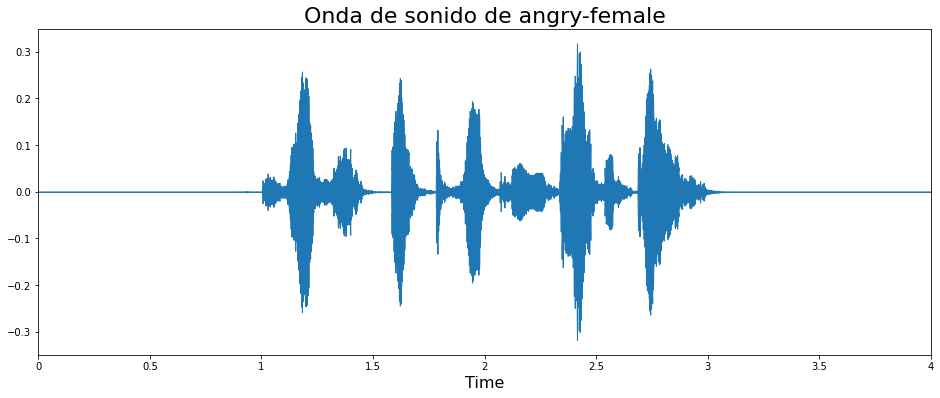

In [6]:
# Variable para escoger valor aleatorio
num = np.random.randint(0, len(RAVDESS_df))

# Utilizaremos librosa para cargar el audio y generar el gráfico de las ondas de sonido
filename = RAVDESS_df.path[num]
data, sampling_rate = librosa.load(filename, sr = 44100) 

# Gráfico

plt.figure(figsize=(16, 6))
emot = RAVDESS_df['emotion_gender'][num]
plt.title(f'Onda de sonido de {emot}', size = 22)
plt.xlabel('Time', size = 16)
librosa.display.waveplot(data, sr= sampling_rate)
plt.show()



<font size= '3'>
Del mismo audio aleatorio mostramos la amplitud  y frecuencia del sonido en el dominio del tiempo frecuencia, para ello utilizaremos la transformación de Fourier y la transformamos a decibélios para poder visualizar mejor los datos. 

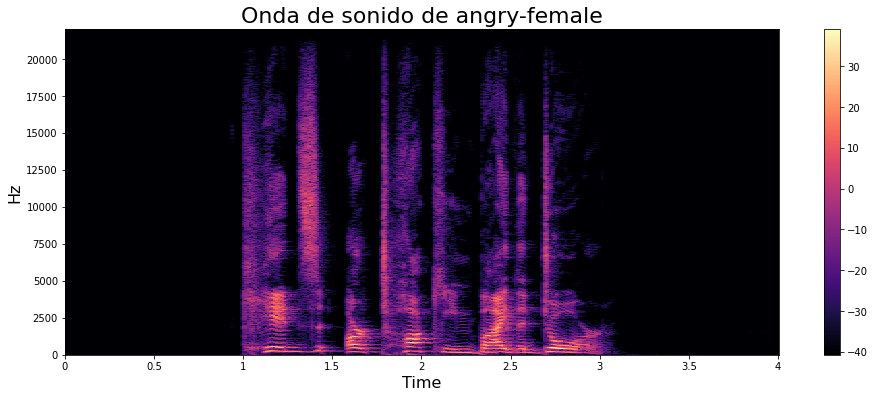

In [7]:
# Transformación Fourier 

F = librosa.stft(data)

# Transformación en decibélios en valor absoluto
Fdb = librosa.amplitude_to_db(abs(F))

plt.figure(figsize=(16, 6))
librosa.display.specshow(Fdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()
plt.xlabel('Time', size = 16)
plt.ylabel('Hz', size = 16)
plt.title(f'Onda de sonido de {emot}', size = 22)
plt.show()

<font size= '3'>
En los dos gráficos podemos ver como varía en cada microsegundo y muestran como los audios los podemos convertir en imágenes de las cuales sacar características. Este punto lo analizaremos más adelante.

<font size= '3'>
Para continuar juntaremos los tres <i>datasets</i> en uno para analizar en profundidad si es necesario modificar, eliminar o crear nuevos datos antes de comenzar con el entreno del modelo.
<br>
<br>
Pero para ello, primero eliminamos las columnas que no comparten las tres bases de datos que son las de la base de datos Ravdess (modality, channel, intensity y sentence)

In [14]:
# Eliminamos las columnas modality, channel, intensity y sentence del dataset RAVDESS
RAVDESS_df = RAVDESS_df.drop(['modality', 'channel', 'intensity', 'sentence'], axis = 1)
RAVDESS_df

emotion   actor  ...   source  emotion_gender
0         happy  female  ...  RAVDESS    happy-female
1           sad  female  ...  RAVDESS      sad-female
2     surprised    male  ...  RAVDESS  surprised-male
3       disgust    male  ...  RAVDESS    disgust-male
4         happy  female  ...  RAVDESS    happy-female
...         ...     ...  ...      ...             ...
1435    disgust    male  ...  RAVDESS    disgust-male
1436  surprised    male  ...  RAVDESS  surprised-male
1437        sad  female  ...  RAVDESS      sad-female
1438    disgust    male  ...  RAVDESS    disgust-male
1439      angry  female  ...  RAVDESS    angry-female

[1440 rows x 5 columns]

<font size= '3'>
Al hacerlo ya podemos concatenar las tres con la función concat de la librería Pandas.

In [15]:
df = pd.concat([RAVDESS_df, SAVEE_df, TESS_df], ignore_index=True) #ignore_index permite resetear los índices.
df

emotion   actor  ...   source  emotion_gender
0         happy  female  ...  RAVDESS    happy-female
1           sad  female  ...  RAVDESS      sad-female
2     surprised    male  ...  RAVDESS  surprised-male
3       disgust    male  ...  RAVDESS    disgust-male
4         happy  female  ...  RAVDESS    happy-female
...         ...     ...  ...      ...             ...
4715      happy  female  ...     TESS    happy-female
4716      happy  female  ...     TESS    happy-female
4717    fearful  female  ...     TESS  fearful-female
4718        sad  female  ...     TESS      sad-female
4719    neutral  female  ...     TESS  neutral-female

[4720 rows x 5 columns]

<font size= '3'>
Una vez creado el dataset único, vamos a ver como se balancean los datos y si hay datos pérdidos, viendo los valores de cada columna y creando gráficos de la distribución del género y de las emociones.

In [17]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())

emotion
happy        652
sad          652
surprised    652
disgust      652
angry        652
fearful      652
neutral      616
calm         192
Name: emotion, dtype: int64
actor
female    3520
male      1200
Name: actor, dtype: int64
path
/gdrive/MyDrive/TFM/RAVDESS//03-01-03-02-01-02-08.wav    1
/gdrive/MyDrive/TFM/TESS/OAF_search_angry.wav            1
/gdrive/MyDrive/TFM/TESS/OAF_seize_fear.wav              1
/gdrive/MyDrive/TFM/TESS/OAF_sell_disgust.wav            1
/gdrive/MyDrive/TFM/TESS/OAF_seize_neutral.wav           1
                                                        ..
/gdrive/MyDrive/TFM/SAVEE/JE_a13.wav                     1
/gdrive/MyDrive/TFM/SAVEE/JE_a12.wav                     1
/gdrive/MyDrive/TFM/SAVEE/JE_a11.wav                     1
/gdrive/MyDrive/TFM/SAVEE/JE_a10.wav                     1
/gdrive/MyDrive/TFM/TESS/OAF_numb_neutral.wav            1
Name: path, Length: 4720, dtype: int64
source
TESS       2800
RAVDESS    1440
SAVEE       480
Name: source, dtyp

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


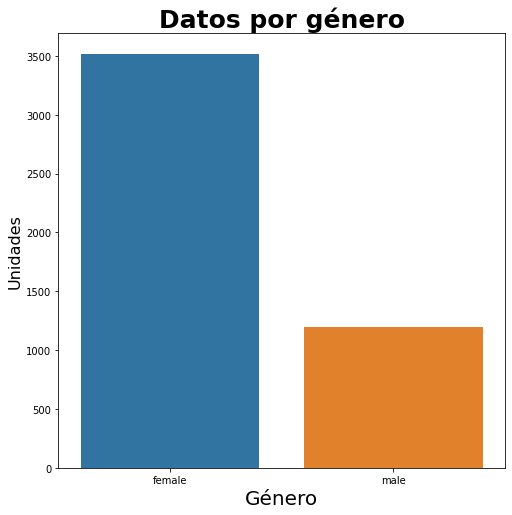

In [18]:
# Genero
plt.figure(figsize= (8,8))
plt.title('Datos por género', size = 25, weight = 'bold')
sns.countplot(df.actor)
plt.xlabel('Género',size = 20)
plt.ylabel('Unidades', size = 16)


plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


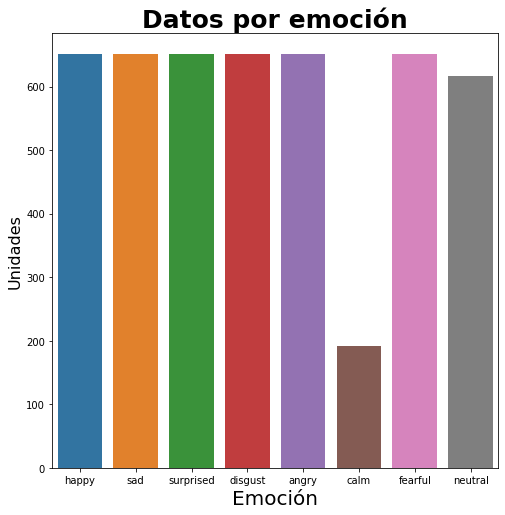

In [19]:
# Genero
plt.figure(figsize= (8,8))
plt.title('Datos por emoción', size = 25, weight = 'bold')
sns.countplot(df.emotion)
plt.xlabel('Emoción',size = 20)
plt.ylabel('Unidades', size = 16)


plt.show()

<font size= '3'>
Observamos que no hay datos pérdidos en ninguna de las columnas de la base de datos, pero si que vemos en el gráfico de género que hay muchos más datos femeninos que masculinos, esto puede provocar que al tener más muestras femeninas el modelo las predija mejor que las masculinas. En cambio, para las emociones, quitando la emoción "calm", todas tienen practicamente las mismas observaciones, así que no debería a ver problemas en este aspecto a la hora de predecir después de generar el modelo.

<font size= '3'>
Una vez que hemos visto como son los datos que extraemos de los nombres de los archivos, tenemos que extraer las características propias de los audios que necesitamos para que nuestro futuro modelo entrené y pueda predecir de un audio nuevo el género y la emoción. Las características que vamos a utilizar son:
<br>
    <ul><li><b>MFCC (Coeﬁcientes Cepstrales en las Frecuencias de Mel)</b>: Son coeficientes que representan el habla basados en la percepción humana y extraen características que aportan valor y eliminan, por ejemplo, el ruido de fondo, el tono, etc. </li>
    <li><b>CHROMA</b>: Captura las características armónicas y melódicas y son resistentes a los cambios en el timbre y la instrumentación.</li>
    <li><b>MEL-SCALED SPECTROGRAM</b>: Representa en un espectograma las frecuencias de audio transformadas en la escala de Mel, la distancia de los sonidos son iguales entre sí.</li>
    <li><b>SPECTRAL CONTRAST</b>: Calcula la diferencia entre las magnitudes máximas y mínimas de frecuencia.</li>
</ul>
<font size= '3'>
Para que el cálculo de MFCC sea correcto, es muy importante que los audios tengan la misma duración, por tanto, calculamos la duración de los 4720 audios y los añadiremos a la base de datos además de ver como se distribuyen en función de la métricas matemáticas.

In [20]:
# Utilizaremos librosa para cargar el audio y calcular los segundos de cada audio
duration = []
for i in range(0, len(df)):
    filename = df.path[i]
    data, sampling_rate = librosa.load(filename, sr = 44100) #sr=frecuencia del audio
    dur = librosa.get_duration(data, sr= sampling_rate)
    duration.append(dur)

In [21]:
df['duration'] = duration

In [23]:
df['duration'].describe()

count    4720.000000
mean        2.738624
std         0.946811
min         1.254082
25%         1.982954
50%         2.388946
75%         3.570249
max         7.138730
Name: duration, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


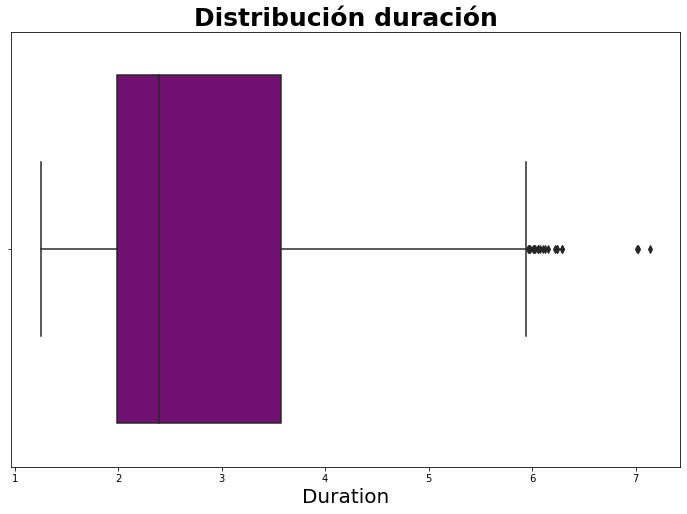

In [24]:
plt.figure(figsize= (12,8))
plt.title('Distribución duración', size = 25, weight = 'bold')
sns.boxplot(df['duration'], color = 'purple')
plt.xlabel('Duration', size = 20)
plt.show()

<font size= '3'>
Podemos ver que no son iguales en duración y, probablemente podemos pensar que todos los datos que rondan los 6 segundos y los pasan son outliers. Vamos a ver cuantas observaciones podrían ser outliers para valorar si quitarlas o no del <i>dataset</i> utilizando los intercuartiles y el rango intercuartílico.

In [25]:
# Cálculo intercuartiles
Q1 = np.percentile(df['duration'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['duration'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print( Q1, Q3, IQR)

1.982891156462585 3.570249433106576 1.5873582766439909


In [26]:
# Por encima del tercer intercuartil
upper = df['duration'] >= (Q3+1.5*IQR)
up = np.where(upper)
up

(array([1573, 1574, 1585, 1654, 1663, 1664, 1678, 1693, 1706, 1707, 1779,
        1780, 1781, 1783, 1786, 1824, 1854, 1869, 1892, 1897]),)

In [29]:
# Por debajo del primer intercuartil
lower = df['duration'] <= (Q1-1.5*IQR)
print(np.where(lower))

(array([], dtype=int64),)


<font size= '3'>
Según el cálculo, habrían 20 outliers, que serían los siguientes.

In [28]:
df_up = df_up.reset_index() # para poder representar estos datos con for es necesario que los indices sean continuos
df_up

index    emotion actor  ... source  emotion_gender  duration
0    1573      angry  male  ...  SAVEE      angry-male  7.024830
1    1574      angry  male  ...  SAVEE      angry-male  6.106916
2    1585    disgust  male  ...  SAVEE    disgust-male  6.032744
3    1654        sad  male  ...  SAVEE        sad-male  6.005782
4    1663        sad  male  ...  SAVEE        sad-male  6.242766
5    1664        sad  male  ...  SAVEE        sad-male  7.138730
6    1678  surprised  male  ...  SAVEE  surprised-male  6.129501
7    1693      angry  male  ...  SAVEE      angry-male  5.957075
8    1706    disgust  male  ...  SAVEE    disgust-male  6.289297
9    1707    disgust  male  ...  SAVEE    disgust-male  7.012585
10   1779        sad  male  ...  SAVEE        sad-male  6.058707
11   1780        sad  male  ...  SAVEE        sad-male  6.079683
12   1781        sad  male  ...  SAVEE        sad-male  6.016757
13   1783        sad  male  ...  SAVEE        sad-male  6.242132
14   1786  surprised  male  ...  SAVEE  surprised-male  6.289297
15   1824    disgust  male  ...  SAVEE    disgust-male  6.055782
16   1854      happy  male  ...  SAVEE      happy-male  5.974830
17   1869    neutral  male  ...  SAVEE    neutral-male  6.156599
18   1892        sad  male  ...  SAVEE        sad-male  5.983651
19   1897        sad  male  ...  SAVEE        sad-male  6.226417

[20 rows x 7 columns]

<font size= '3'>
Al ser todas del género masculino, el que tiene menos observaciones, no las vamos a quitar del modelo, pero vamos a analizar si son posibles errores de grabación y hayan segundos al inicio o el final del audio vacíos representando las ondas de sonido.

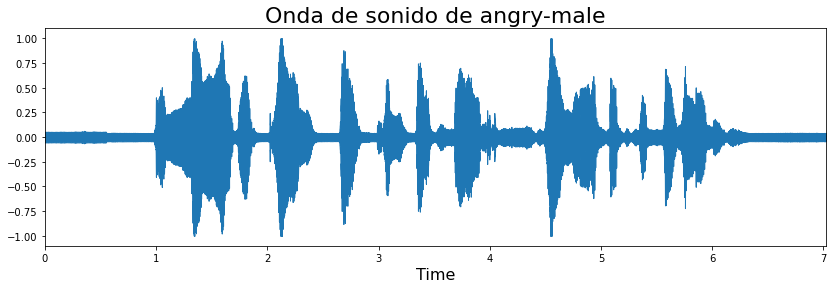

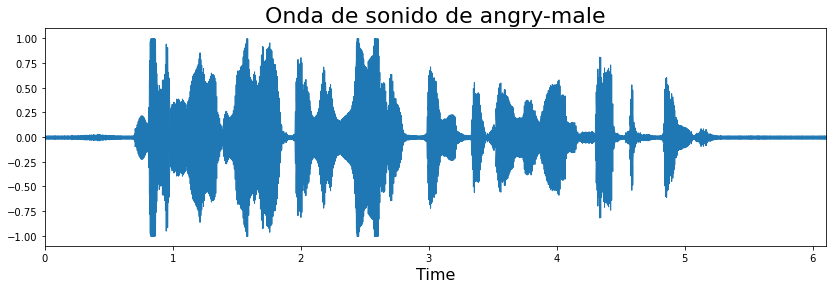

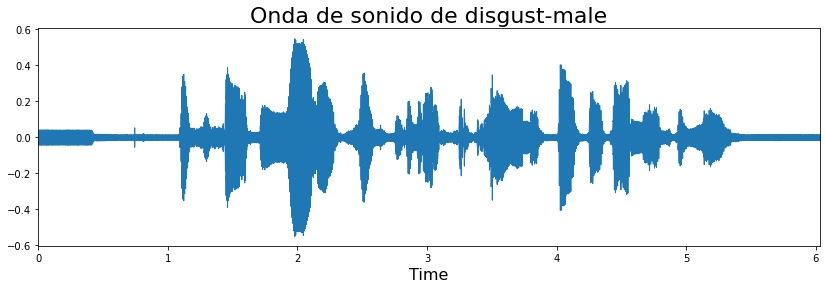

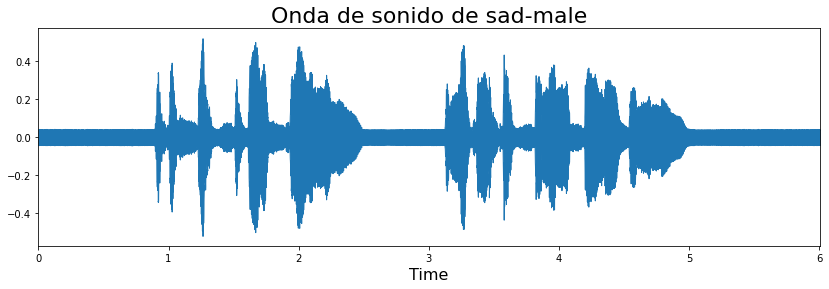

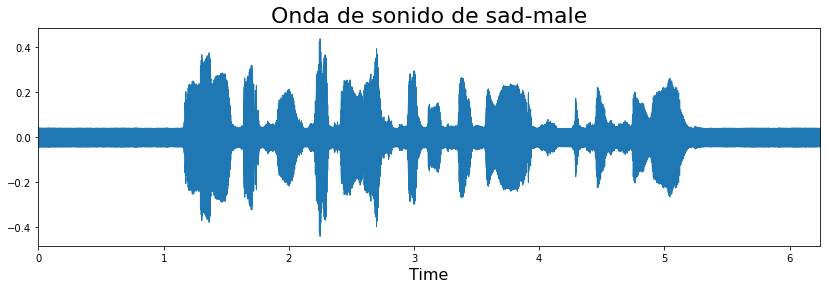

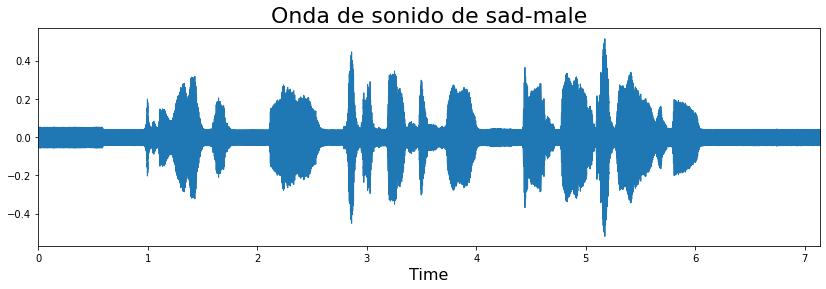

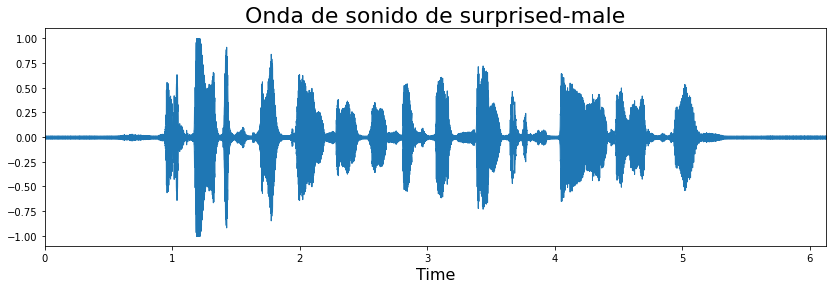

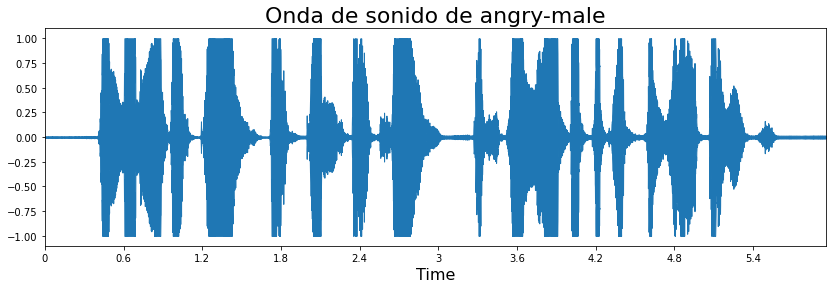

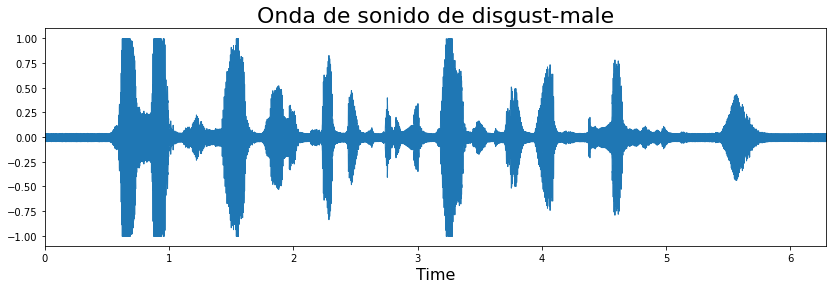

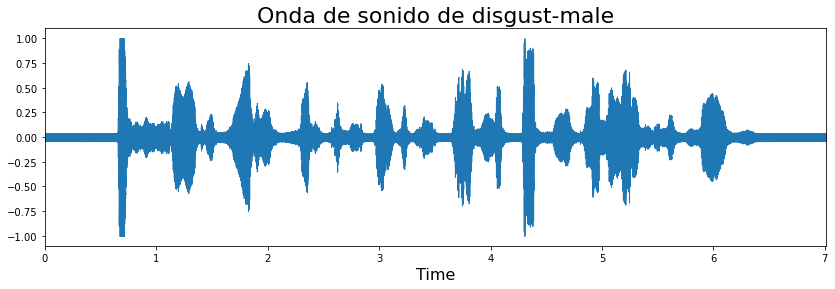

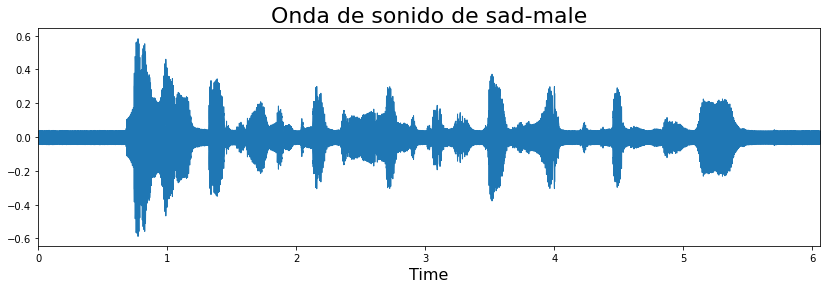

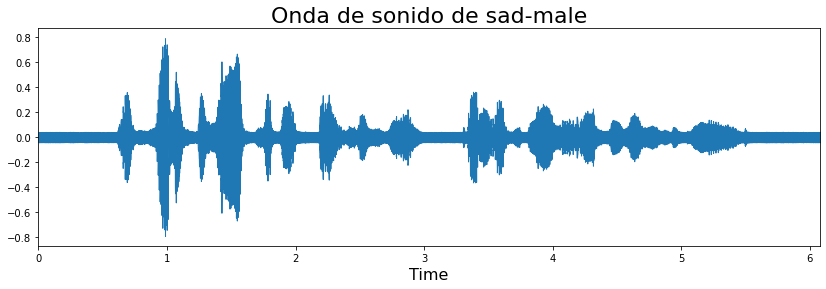

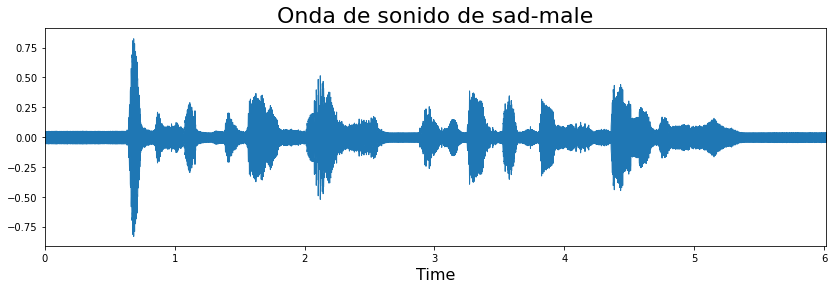

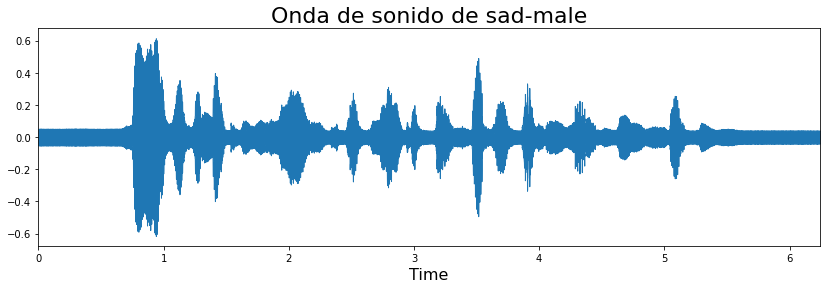

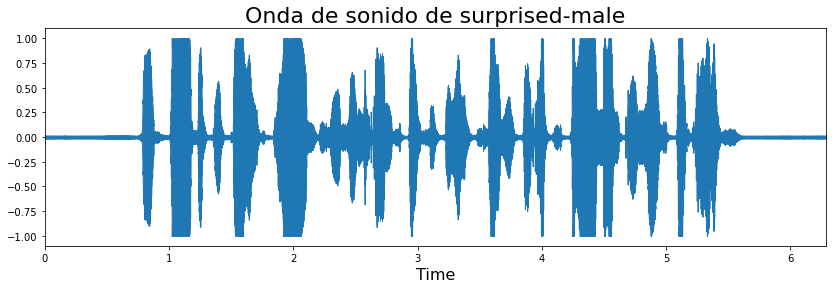

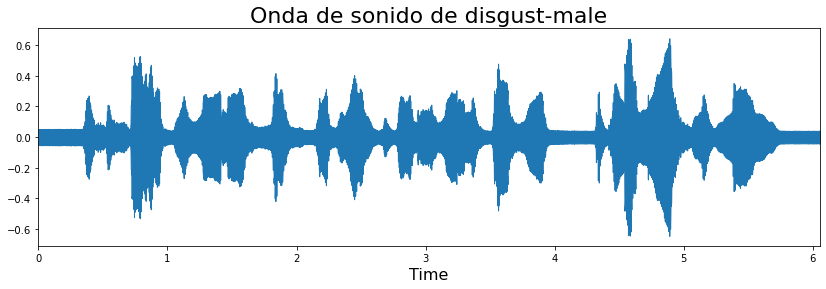

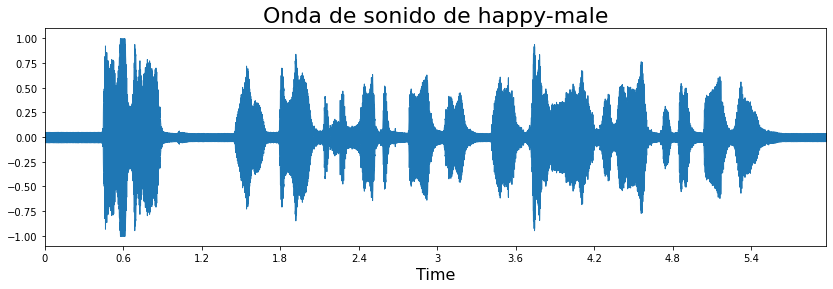

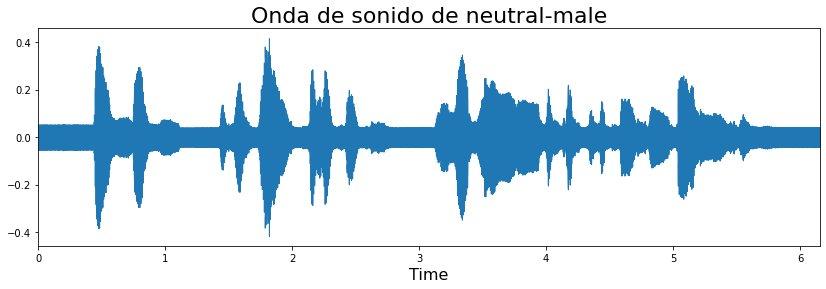

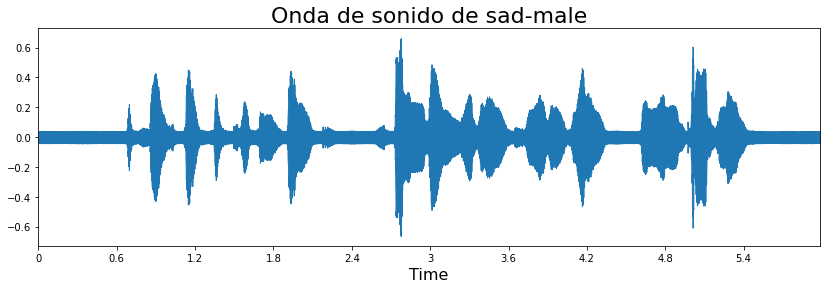

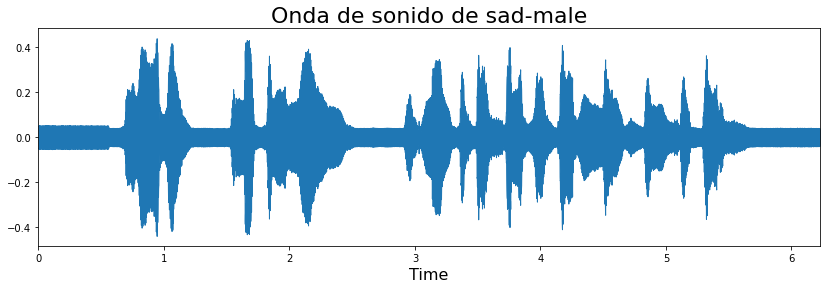

In [30]:
# Utilizaremos librosa para cargar el audio y generar el gráfico de las ondas de sonido
for i in range(0, len(df_up)):
    filename = df_up.path[i]
    data, sampling_rate = librosa.load(filename, sr = 44100) 

    # Gráfico
    plt.figure(figsize=(14, 4))
    emot = df_up['emotion_gender'][i]
    plt.title(f'Onda de sonido de {emot}', size = 22)
    plt.xlabel('Time', size = 16)
    librosa.display.waveplot(data, sr= sampling_rate)
    plt.show()

<font size= '3'>
En alguno de los casos parece que si que es por este motivo, entonces en la carga de los datos para extraer las caractéristicas, pondremos limitación de 5 segundos para que así todas tengan la misma duración y no se pierdan estos audios al eliminarlos de la base de datos.
<br><br>En el anexo, se puede ver que intentamos quitar, con la función trimde la librería Librosa, los espacios vacíos del inicio y el final de todos los audios pero provocó aún más outlier, así que no lo utilizamos para el modelo.

<font size= '3'>
El siguiente paso es extraer las caractéristicas, cargar todos los datos y generar los <i>datasets</i> de train y test. Para facilitarlo, creamos las funciones "extract_feature" y "load_data".

In [36]:
# función para sacar todas las características

def extract_feature(filename, mfcc, chroma, mel, contrast):
  """ Introduciremos la base de datos y las características que queremos sacar
  filename =  datos
  mfcc = si es True calculará las características de mfcc
  chroma = si es True calculará las características de chroma
  mel = si es True calculará las características de espectograma de mel-scaled
  contrast = si es True calculará las características de contraste espectral

  return: array con resultados

  """
  data, sampling_rate = librosa.load(filename, sr = 44100)
    if chroma:
    #Transformada de Fourier (STFT) para poder sacar las caracterísitcas Chroma y el contraste espectral
    stft = np.abs(librosa.stft(data))
    result = np.array([])
  
    if mfcc:
    #Media de las características MFCC
    mfcc = np.mean(librosa.feature.mfcc(data, sr = sampling_rate, n_mfcc= 20).T, axis = 0) 
    result = np.hstack((result, mfcc))

    if chroma:
    #Media de las características Chroma
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sampling_rate).T, axis = 0) 
    result = np.hstack((result, chroma))

    if mel:
    #Media Espectograma de mel-scaled 
    mel = np.mean(librosa.feature.melspectrogram(data, sr=sampling_rate).T, axis = 0)
    result = np.hstack((result, mel))
  
    if contrast:
    #Media Contraste espectral
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sampling_rate).T, axis = 0)
    result = np.hstack((result, contrast))
  
  return result

In [37]:
def load_data(test_size = 0.2):
  """ Función para cargar los datos y sacar las características necesarias para
  poder modelar generando la separación de train y test.
  test_size = porcentaje de datos que irán a la parte de test.
  
  return: separación de los datos en train y test
  """
    X = []
    y = []
    for i in range(0, len(df)):
    filename = df.path[i]
    data, sampling_rate = librosa.load(filename, sr = 44100, duration = 5)
    emotion = df['emotion_gender'][i]
    y.append(emotion)
    features = extract_feature(filename, mfcc = True, chroma = True, mel = True, contrast = True)
    X.append(features)
    return train_test_split(np.array(X), np.array(y), test_size = test_size, random_state = 16) 


<font size= '3'>
Como se observa, las dos funciones están relacionadas para extraer el Train y Test para modelar.    

In [38]:
# Separar train y test
X_train, X_test, y_train, y_test = load_data(test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3776, 167), (944, 167), (3776,), (944,))

<font size= '3'>
Antes de empezar a modelar, al utilizar un modelo CNN (redes neuronales convolucionales) tenemos que transformar a categórica los valores objetivo y generar una dimensión adicional para las características ya que han de tener 3 dimensiones.

In [39]:
X_train1 = X_train
y_train1 = y_train
X_test1 = X_test
y_test1 = y_test

lb = LabelEncoder()

y_train1 = np_utils.to_categorical(lb.fit_transform(y_train1))
y_test1 = np_utils.to_categorical(lb.fit_transform(y_test1))

In [40]:
X_traincnn = np.expand_dims(X_train1, axis = 2)
X_testcnn = np.expand_dims(X_test1, axis = 2)

X_traincnn.shape


(3776, 167, 1)

<font size= '3'>
Procedemos a entrenar los datos con un modelo de redes neuronales como indicado en la metodología. En el anexo del trabajo se encuentran todos los modelos entrenados pero nos quedamos con el último que consiste en cuatro capas de convolución con una capa de pooling en la tercera convolución, una regularización con Dropout entre la segunda convolución y la tercera, un flatten antes de la capa fully connected y por ultimo un callback de early stopping. Para todas las convoluciones se utiliza el método de activación "relu" pero para la fully connected una densa de dieciseis con activación softmax.

In [83]:
model7 = Sequential()
# Convolution Layer 1
model7.add(Conv1D(256, 5,padding='same',
                 input_shape=(167,1)))
model7.add(Activation('relu'))
# Convolution Layer 2
model7.add(Conv1D(128, 5,padding='same'))
model7.add(Activation('relu'))
# Regularización
model7.add(Dropout(0.1)) 
# Convolution + pooling Layer 3
model7.add(MaxPooling1D(pool_size=(8)))
model7.add(Conv1D(128, 5,padding='same',))
model7.add(Activation('relu'))
# Convolution Layer 4
model7.add(Conv1D(128, 5,padding='same',))
model7.add(Activation('relu'))
# Flattening
model7.add(Flatten())
# Fully-connected
model7.add(Dense(16))
model7.add(Activation('softmax'))
# Callback
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=42,
                                              verbose=1) 
model7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 167, 256)          1536      
                                                                 
 activation_30 (Activation)  (None, 167, 256)          0         
                                                                 
 conv1d_25 (Conv1D)          (None, 167, 128)          163968    
                                                                 
 activation_31 (Activation)  (None, 167, 128)          0         
                                                                 
 dropout_7 (Dropout)         (None, 167, 128)          0         
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 20, 128)          0         
 1D)                                                             
                                                      

<font size='3'>
Vemos que entrenará 370,576 parámetros y el modelo utilizará una función de pérdida categorical_crossentropy, dado que es un problema de multiclase,  el optimizador será rmsprop y la métrica, accuracy.

In [84]:
model7.compile(loss='categorical_crossentropy', optimizer= 'rmsprop',metrics=['accuracy'])

<font size='3'>
El modelo entrenará durante 250 épocas si el callback no se activa y con 64 (batch size) entrenamientos por cada iteración.

In [85]:
cnnhistory7=model7.fit(X_traincnn, y_train1, batch_size=64, epochs=250, validation_data=(X_testcnn, y_test1), callbacks= [early_stop])

Epoch 1/250
59/59 [==============================] - 21s 339ms/step - loss: 2.7831 - accuracy: 0.2161 - val_loss: 1.7574 - val_accuracy: 0.4110
Epoch 2/250
59/59 [==============================] - 20s 335ms/step - loss: 1.5279 - accuracy: 0.4915 - val_loss: 1.1889 - val_accuracy: 0.6123
Epoch 3/250
59/59 [==============================] - 20s 335ms/step - loss: 1.1051 - accuracy: 0.6266 - val_loss: 0.9717 - val_accuracy: 0.6716
Epoch 4/250
59/59 [==============================] - 20s 341ms/step - loss: 0.8997 - accuracy: 0.6872 - val_loss: 0.8783 - val_accuracy: 0.7044
Epoch 5/250
59/59 [==============================] - 20s 337ms/step - loss: 0.8089 - accuracy: 0.7174 - val_loss: 0.7765 - val_accuracy: 0.7299
Epoch 6/250
59/59 [==============================] - 20s 336ms/step - loss: 0.7212 - accuracy: 0.7397 - val_loss: 0.7219 - val_accuracy: 0.7405
Epoch 7/250
59/59 [==============================] - 20s 335ms/step - loss: 0.6338 - accuracy: 0.7696 - val_loss: 0.7120 - val_accuracy:

<font size='3'>
El modelo al entrenar ha parado en la época 60 utilizando el early stopping que creamos en el modelo, eso significa que el modelo dejó de mejorar en ese punto.
<br>
<br>
Vamos a comprobar el accuracy de la predición del test guardado con el creado por el modelo.

In [87]:
#predicción 
y_pred7 = model7.predict(X_testcnn)
# Cambiamos los valores categóricos a los valores en nombre
preds7=y_pred7.argmax(axis=1)
abc = preds7.astype(int).flatten()
predictions7 = (lb.inverse_transform((abc)))

preddf7 = pd.DataFrame({'predictedvalues': predictions7})
preddf7

predictedvalues
0      fearful-female
1    surprised-female
2           calm-male
3         calm-female
4        happy-female
..                ...
939  surprised-female
940      neutral-male
941      fearful-male
942  surprised-female
943      angry-female

[944 rows x 1 columns]

In [88]:
# Calculo accuracy con la predicción
accuracy7 = accuracy_score(y_true = y_test, y_pred = preddf7)

print('Accuracy: {:.2f}%'.format(accuracy7*100))

Accuracy: 84.22%


<font size='3'>
Vemos que da un 84,22% de precisión, un resultado muy positivo, significa que hay un porcentaje muy bajo de identificar mal el género y la emoción del audio. La matrix de confusión que vemos a continuación lo corrobora.

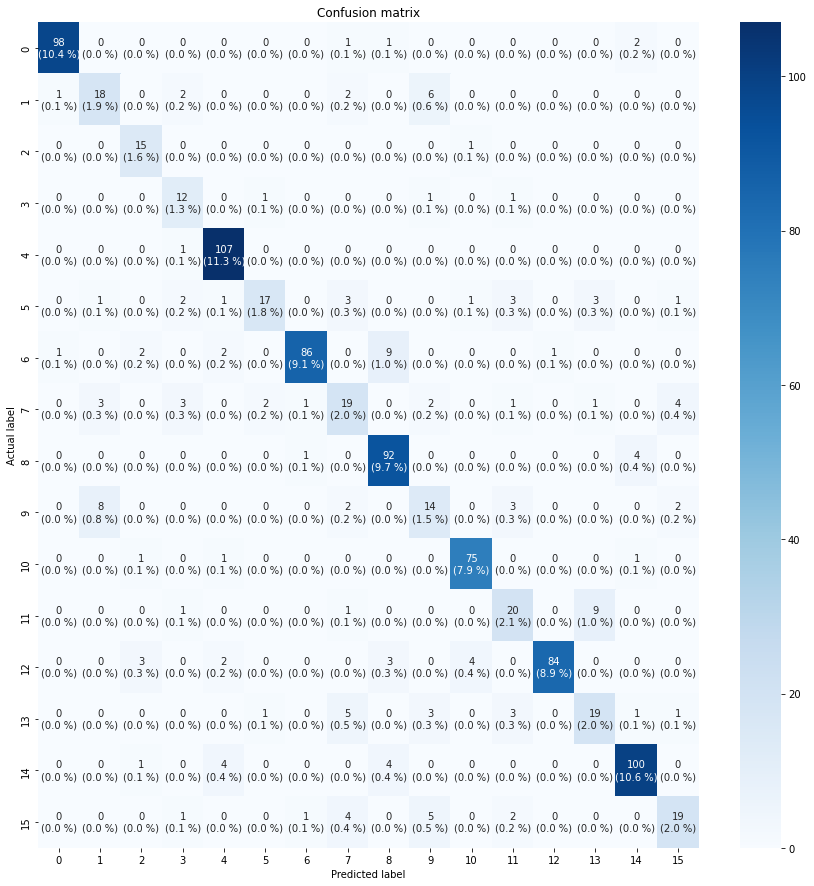

In [89]:
cnf_matrix7 = confusion_matrix(y_test, preddf7)

plt.figure(figsize=(12, 12))
group_counts = [f'{value:0.0f}' for value in cnf_matrix7.flatten()]
group_percentages = [f'{100 * value:0.1f} %' for value in 
                      cnf_matrix7.flatten()/np.sum(cnf_matrix7)]
labels = [f'{v1}\n({v2})' for v1, v2 in
          zip(group_counts,group_percentages)]
n = int(np.sqrt(len(labels)))
labels = np.asarray(labels).reshape(n,n)
sns.heatmap(cnf_matrix7, annot=labels, fmt='', cmap='Blues')

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

<font size='3'>
Para ver que el modelo predice correctamente, vamos a hacer varias pruebas con un audio grabado. Solo expondremos una de ellas, pero se pueden ver en el anexo del trabajo varias pruebas más. 
<br>
<br>
Antes de ello, hay que guardar el modelo en formato h5 (hericaldataframe) ya que optimiza las llamadas, genera mejores recursos y es mucho más rápido que un csv y cargarlo.

In [111]:
# Guardamos modelo elegido

model_name = 'Reconocimiento_Modelo.h5'
save_dir = os.path.join('/gdrive/MyDrive/TFM/', 'modelo_guardado')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Modelo guardado del entrenamiento %s ' % model_path)



Modelo guardado del entrenamiento /gdrive/MyDrive/TFM/modelo_guardado/Reconocimiento_Modelo.h5 


In [112]:
import json
model_json = model7.to_json()
with open("model_json", "w") as json_file:
    json_file.write(model_json)

In [113]:
# Cargamos el archivo Json y creamos el modelo
from keras.models import model_from_json
json_file = open('model_json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('/gdrive/MyDrive/TFM/modelo_guardado/Reconocimiento_Modelo.h5')
print('Cargamos modelo')
 



Cargamos modelo


<font size='3'>
Ahora si que podemos pasar el audio por el modelo y ver que nos dice, el audio se se trata de un hombre disgustado.

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


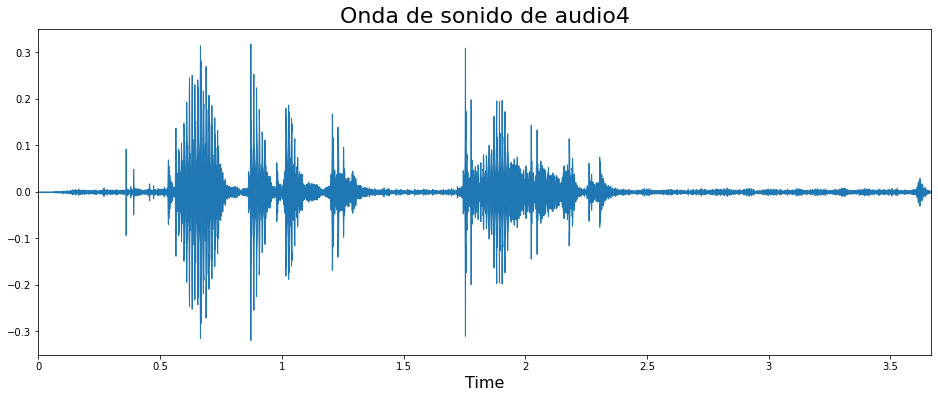

In [127]:
filename2 = '/gdrive/MyDrive/TFM/Pruebas/audio4.wav'
data, sampling_rate = librosa.load(filename2, sr = 44100) 

# Gráfico

plt.figure(figsize=(16, 6))
plt.title(f'Onda de sonido de audio4', size = 22)
plt.xlabel('Time', size = 16)
librosa.display.waveplot(data, sr= sampling_rate)
plt.show()

In [128]:
# Cargamos y extraemos los datos del archivo de audio creado
prueba2 = []
data, sampling_rate = librosa.load(filename2, sr = 44100, duration = 5)
features = extract_feature(filename2, mfcc = True, chroma = True, mel = True, contrast = True)
prueba2.append(features)

prueba2 = pd.DataFrame(prueba2)
prueba2

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


0           1         2    ...        164        165       166
0 -454.670258  137.694504  1.939484  ...  14.851059  18.808295  40.31996

[1 rows x 167 columns]

In [129]:
# Generamos una nueva dimension para utilizar el modelo

prueba2cnn = np.expand_dims(prueba2, axis=2)

In [130]:
# predecimos

prueba2_pred = loaded_model.predict(prueba2cnn, batch_size=16, verbose = 1)

prueba2_pred

1/1 [==============================] - 0s 25ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [131]:
prueba2_pred2 = prueba2_pred.argmax(axis=1)
prueba2_abc = prueba2_pred2.astype(int).flatten()
prediccion2 = (lb.inverse_transform((prueba2_abc )))
prediccion2 

array(['disgust-male'], dtype='<U16')

<font size='3'>
Vemos que predice correctamente este audio.

<br>

<br>

<br>

# Conclusiones

<font size='3'>
Una vez desarrollado todo el proyecto, desde la introducción de los datos, pasando por procesarlos y generar un modelo predictivo, hasta la predicción de un audio nuevo, puedo decir que ha sido un reto apasionante para mi. Sobretodo, porque aún con las dudas e inseguridades de trabajar con datos no estructurados de los cuales no tenía mucho conocimiento técnico previo, me ha permitido profundizar en ellos y poder llegar a comprender como funcionan. Y con este aprendizaje poder generar un modelo que da una exactitud de predicción de un 84%, un muy buen resultado para un modelo en términos generales, y que he podido comprobar introduciendo audios creados a posteriori. 
<br>
<br>
En mi opinión, el resultado final se podría haber mejorado si hubiera tenido accesso al aplicativo de Google Colab de pago que actualmente no está disponible en nuestro país. Esto generó retrasos en el procesado de datos, retrasando consecuentemente la viabilidad de generar una aplicación completa vinculada a la API de un sofware de música (Spotify, Apple Music, etc.). Ya que este modelo permitiría continuar con el objetivo por el que investigué y analicé emociones en los audios, crear una aplicación que me permitiera poner canciones en aplicaciones de música según mi estado de ánimo.

<br>

<br>

<br>

# Bibliografía

<font size= '3'>
<ul>
    <li>Páginas web:</li>
    <ul>
        <br>
        <li>Artículos:
            <ul><br><li>Aplicación de la red neuronal convolucional (CNN) en el reconocimiento de voz
                <br><a>https://programmerclick.com/article/58491569486/</a></li>
            <br>
            <li>Biometría de voz con Librosa y CNN
                <br><a>https://guillermoacharuiz.com/portfolio/biometriadevoz/ </a></li>
            <br>
            <li>Classifying emotions using audio recordings and Python
                <br><a>https://towardsdatascience.com/classifying-emotions-using-audio-recordings-and-python-434e748a95eb#_ftn1 </a></li>
            <br>
            <li>CNNs for Audio Classification
                <br><a>https://towardsdatascience.com/classifying-emotions-using-audio-recordings-and-python-434e748a95eb#_ftn1 </a></li>
            <br>
            <li>How To Easily Merge Multiple Jupyter Notebooks Into One
                <br><a>https://towardsdatascience.com/how-to-easily-merge-multiple-jupyter-notebooks-into-one-e464a22d2dc4 </a></li>
            <br>
            <li>How to Perform Sentiment Analysis Over Audio Files with Python
                <br><a>https://towardsdatascience.com/sentiment-analysis-assemblyai-python-a4686967e0fc </a></li>
                <br> </ul>
        <li> Datasets:
            <ul><br><li>Ravdess- "The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)" by Livingstone & Russo is licensed under CC BY-NA-SC 4.0.
                <br><a>https://www.kaggle.com/uwrfkaggler/ravdess-emotional-speech-audio </a></li>
            <br>
            <li>Surrey Audio-Visual Expressed Emotion (SAVEE)
                <br><a>http://personal.ee.surrey.ac.uk/Personal/P.Jackson/SAVEE/Register.html </a></li>
            <br>
            <li>University of Toronto (TESS)
                <br><a>https://tspace.library.utoronto.ca/handle/1807/24487 </a></li>
            <br></ul>
        <li> Librerías de Python:
            <ul><br><li>  Keras
                <br><a>https://keras.io/about/ </a></li>
            <br>
            <li>Librosa
                <br><a>https://librosa.org/doc/latest/index.html</a></li>
            <br></ul>
        <br>
    <li>Repositorios GitHub:</li>
    <ul>
        <br>
        <li>Speech Emotion Analyzer.
            <br><a>https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer</a></li>
        <br>
        <li>Speech Emotion Recognition
            <br><a>https://github.com/talbaram3192/Emotion_Recognition_project</a></li>
    </ul>
    <br>
    <li>Youtube:</li>
    <ul>
        <br>
        <li>Minor Project Batch 58|Speech emotion Recognition Using Machine Learning.
            <br><a>https://www.youtube.com/watch?v=eHJrZa2LtKw&ab_channel=ajilks</a></li>
        <br>
        <li>Part 1-EDA-Audio Classification Project Using Deep Learning.
            <br><a>https://www.youtube.com/watch?v=mHPpCXqQd7Y&ab_channel=KrishNaik</a></li>
        <br>
        <li>Speech Emotion Detection.
            <br><a>https://www.youtube.com/watch?v=26_qiXEa8lw&ab_channel=Amazonre%3AMARS</a></li>
        <br>
        <li>Speech Emotion Detection | DWDM and ML Based Project.
            <br><a>https://www.youtube.com/watch?v=qcW12hRZfJE&t=983s&ab_channel=sakshijain</a></li>
        <br>
        <li>Speech Emotion Recognition using Deep Learning.
            <br><a>https://www.youtube.com/watch?v=LaYGr4ErXn0&t=2s&ab_channel=ProfessionalCipher</a></li>
        <br>
        <li>Speech Emotion Recognition using Deep learning.
            <br><a>https://www.youtube.com/watch?v=p5glHn5Nlo0&ab_channel=leadingindia.ai</a></li>
        <br>
        <li>Read and Visualize Audio Files in Python (librosa module).
            <br><a>https://www.youtube.com/watch?v=vJ_WL9aYfNI&t=641s&ab_channel=DataScienceGarage</a></li>
    </ul>
    <br>
</ul>
    
    

<br>

<br>

<br>

# Anexo

## Vinculamos con Google Drive

In [1]:
import os
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## Cargamos las direcciones donde están los datasets

In [2]:
main_path = '/gdrive/MyDrive/TFM/'
RAV = os.path.join(main_path, 'RAVDESS/')
SAVEE = os.path.join(main_path, 'SAVEE/')
TESS = os.path.join(main_path, 'TESS/')

## Importamos las librerías que vamos a utilizar


In [3]:
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras import optimizers
from keras import regularizers
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
import IPython

## EDA de todos los datasets

### RAVDESS

In [4]:
# Creamos listas vacías para ir añadiendo la información que nos proporcionan los nombres de los archivos sobre el audio

modality = []
channel_voice = []
emotion = []
intensity_emotion = []
sentence = []
actor = []
full_path =[]

for root, dirs, files in tqdm(os.walk(RAV)):
    for file in files:
        try:
        # creamos variables que extraen los numeros del nombre del archivo
        modal = int(file[1:2])
        voice = int(file[4:5])
        emot = int(file[7:8])
        intense = int(file[10:11])
        sente = int(file[13:14])
        act = int(file[19:20])

        # Añadimos en las listas vacías los datos extraídos

        modality.append(modal)
        channel_voice.append(voice)
        emotion.append(emot)
        intensity_emotion.append(intense)
        sentence.append(sente)
        actor.append(act)

      # Añadimos el nombre de ruta

        full_path.append([root, file])
        except ValueError:
            continue

0it [00:00, ?it/s]

Transformamos los números en el significado que tienen a la vez que creamos la base de datos


In [5]:
RAVDESS_df = pd.DataFrame([emotion, modality, channel_voice, intensity_emotion, actor, sentence, full_path]).T
RAVDESS_df.columns = ['emotion', 'modality', 'channel', 'intensity', 'actor', 'sentence', 'path']
RAVDESS_df['emotion'] = RAVDESS_df['emotion'].map({1:'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprised'})
RAVDESS_df['modality'] = RAVDESS_df['modality'].map({1: 'full-AV', 2: 'video-only', 3: 'audio-only'})
RAVDESS_df['channel'] = RAVDESS_df['channel'].map({1: 'speech', 2: 'song'})
RAVDESS_df['intensity'] = RAVDESS_df['intensity'].map({1: 'normal', 2: 'strong'})
RAVDESS_df['actor'] = RAVDESS_df['actor'].apply(lambda x: 'female' if x%2 == 0 else 'male') 
RAVDESS_df['sentence'] = RAVDESS_df['sentence'].map({1: 'Kids are talking by the door', 2: 'Dogs are sitting by the door'})
RAVDESS_df['path'] = RAVDESS_df['path'].apply(lambda x: x[0] + '/' + x[1])
RAVDESS_df['source'] = 'RAVDESS'
# creamos la emoción según el género ya que probablemente las ondas, frecuencia, amplitud y características serán distintas para la misma emoción 
RAVDESS_df['emotion_gender'] = RAVDESS_df['emotion'] + '-' + RAVDESS_df['actor'] 
RAVDESS_df.head()

emotion    modality  ...   source  emotion_gender
0      happy  audio-only  ...  RAVDESS    happy-female
1        sad  audio-only  ...  RAVDESS      sad-female
2  surprised  audio-only  ...  RAVDESS  surprised-male
3    disgust  audio-only  ...  RAVDESS    disgust-male
4      happy  audio-only  ...  RAVDESS    happy-female

[5 rows x 9 columns]

Vamos a mostrar un gráfico que representa las ondas sonoras de un audio aleatorio de la base de datos.

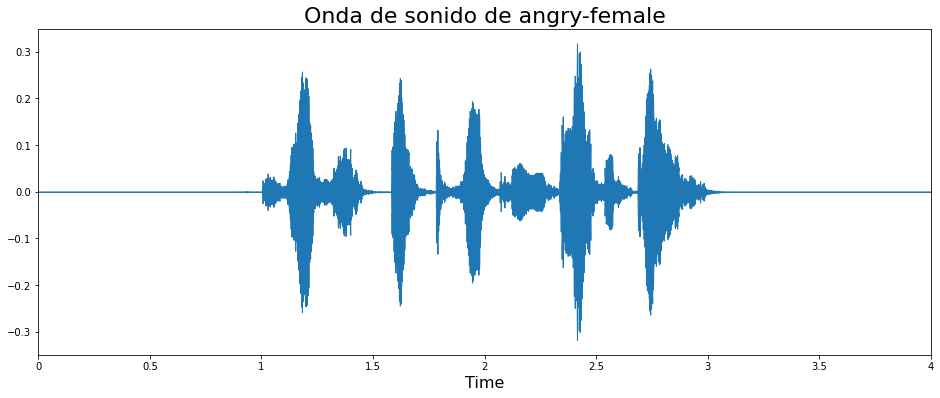

In [6]:
# Variable para escoger valor aleatorio
num = np.random.randint(0, len(RAVDESS_df))

# Utilizaremos librosa para cargar el audio y generar el gráfico de las ondas de sonido
filename = RAVDESS_df.path[num]
data, sampling_rate = librosa.load(filename, sr = 44100) 

# Gráfico

plt.figure(figsize=(16, 6))
emot = RAVDESS_df['emotion_gender'][num]
plt.title(f'Onda de sonido de {emot}', size = 22)
plt.xlabel('Time', size = 16)
librosa.display.waveplot(data, sr= sampling_rate)
plt.show()



Ahora mostraremos la amplitud  y frecuencia del sonido en el dominio del tiempo frecuencia, para ello utilizaremos la transformación de Fourier y la transformaremos a decibélios para poder visualizar mejor los datos. 

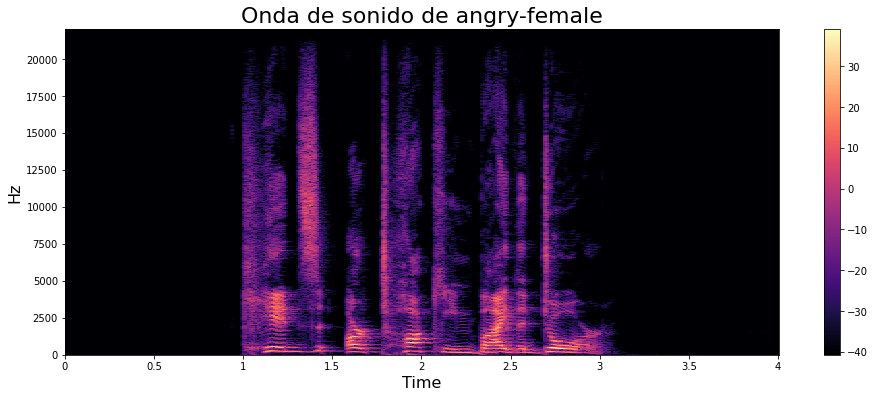

In [7]:
# Transformación Fourier 

F = librosa.stft(data)

# Transformación en decibélios en valor absoluto
Fdb = librosa.amplitude_to_db(abs(F))

plt.figure(figsize=(16, 6))
librosa.display.specshow(Fdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()
plt.xlabel('Time', size = 16)
plt.ylabel('Hz', size = 16)
plt.title(f'Onda de sonido de {emot}', size = 22)
plt.show()

### SAVEE

In [8]:
# Creamos listas vacías de los datos

emotion = []
path = []

# Sacamos la información de todos los nombres de los archivos
for i in os.listdir(SAVEE):
    if i[-8:-6] == '_a':
        emotion.append('angry')
    elif i[-8:-6] == '_d':
        emotion.append('disgust')
    elif i[-8:-6] == '_f':
        emotion.append('fearful')
    elif i[-8:-6] == '_h':
        emotion.append('happy')
    elif i[-8:-6] == '_n':
        emotion.append('neutral')
    elif i[-8:-6] == 'sa':
        emotion.append('sad')
    elif i[-8:-6] == 'su':
        emotion.append('surprised')
    else:
        emotion.append('unknown')
    path.append(SAVEE + i)
# Creamos el dataset
SAVEE_df = pd.DataFrame([emotion, path]).T
SAVEE_df.columns = ['emotion', 'path']
SAVEE_df['actor'] = 'male'
SAVEE_df['source'] = 'SAVEE'
# creamos la emoción según el género ya que probablemente las ondas, frecuencia, amplitud y características serán distintas para la misma emoción 
SAVEE_df['emotion_gender'] = SAVEE_df['emotion'] + '-' + SAVEE_df['actor'] 
SAVEE_df

emotion                                   path  ... source  emotion_gender
0        angry   /gdrive/MyDrive/TFM/SAVEE/KL_a01.wav  ...  SAVEE      angry-male
1        angry   /gdrive/MyDrive/TFM/SAVEE/KL_a02.wav  ...  SAVEE      angry-male
2        angry   /gdrive/MyDrive/TFM/SAVEE/KL_a03.wav  ...  SAVEE      angry-male
3        angry   /gdrive/MyDrive/TFM/SAVEE/KL_a04.wav  ...  SAVEE      angry-male
4        angry   /gdrive/MyDrive/TFM/SAVEE/KL_a05.wav  ...  SAVEE      angry-male
..         ...                                    ...  ...    ...             ...
475  surprised  /gdrive/MyDrive/TFM/SAVEE/DC_su13.wav  ...  SAVEE  surprised-male
476  surprised  /gdrive/MyDrive/TFM/SAVEE/DC_su14.wav  ...  SAVEE  surprised-male
477  surprised  /gdrive/MyDrive/TFM/SAVEE/DC_su15.wav  ...  SAVEE  surprised-male
478  surprised  /gdrive/MyDrive/TFM/SAVEE/DC_su10.wav  ...  SAVEE  surprised-male
479    neutral   /gdrive/MyDrive/TFM/SAVEE/JK_n24.wav  ...  SAVEE    neutral-male

[480 rows x 5 columns]

Vamos a mostrar un gráfico que representa las ondas sonoras de un audio aleatorio de la base de datos.

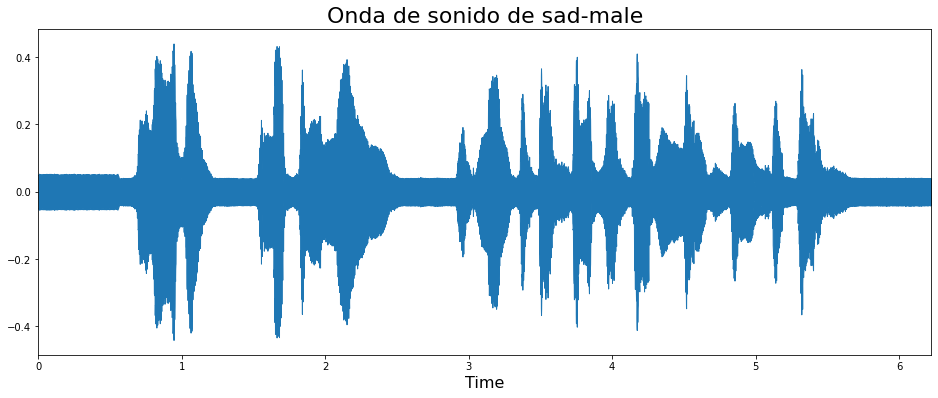

In [9]:
# Variable para escoger valor aleatorio
num = np.random.randint(0, len(SAVEE_df))

# Utilizaremos librosa para cargar el audio y generar el gráfico de las ondas de sonido
filename = SAVEE_df.path[num]
data, sampling_rate = librosa.load(filename, sr = 44100) 

# Gráfico

plt.figure(figsize=(16, 6))
emot = SAVEE_df['emotion_gender'][num]
plt.title(f'Onda de sonido de {emot}', size = 22)
plt.xlabel('Time', size = 16)
librosa.display.waveplot(data, sr= sampling_rate)
plt.show()



Ahora mostraremos la amplitud  y frecuencia del sonido en el dominio del tiempo frecuencia, para ello utilizaremos la transformación de Fourier y la transformaremos a decibélios para poder visualizar mejor los datos. 

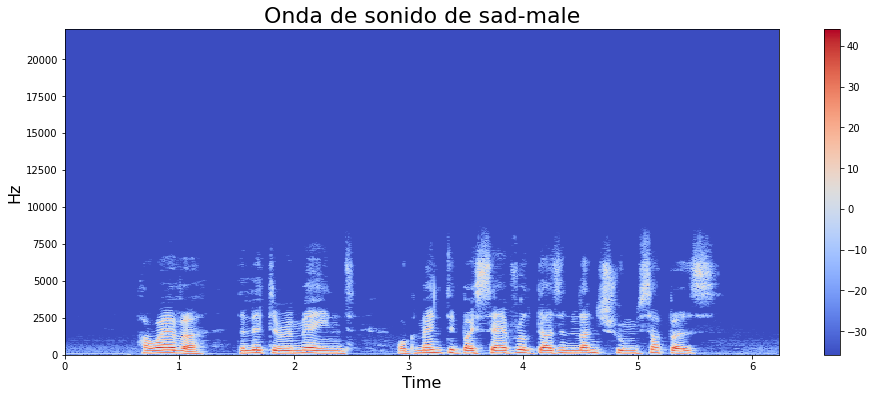

In [10]:
# Transformación Fourier 

F = librosa.stft(data)

# Transformación en decibélios en valor absoluto
Fdb = librosa.amplitude_to_db(abs(F))

plt.figure(figsize=(16, 6))
librosa.display.specshow(Fdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()
plt.xlabel('Time', size = 16)
plt.ylabel('Hz', size = 16)
plt.title(f'Onda de sonido de {emot}', size = 22)
plt.show()

### TESS

In [11]:
# Sacamos los datos de los nombres de los archivos creando primero las listas vacías

emotion = []
path = []

for i in os.listdir(TESS):
    if '_angry.' in i[:]:
        emotion.append('angry')
    elif '_disgust.' in i[:]:
        emotion.append('disgust')
    elif '_fear.' in i[:]:
        emotion.append('fearful')
    elif '_happy.' in i[:]:
        emotion.append('happy')
    elif '_ps.' in i[:]:
        emotion.append('surprised')
    elif '_sad.' in i[:]:
        emotion.append('sad')
    elif '_neutral.' in i[:]:
        emotion.append('neutral')
    else:
        emotion.append('unknown')
    path.append(TESS + i)

# Creamos base de datos
TESS_df = pd.DataFrame([emotion, path]).T
TESS_df.columns = ['emotion', 'path']
TESS_df['actor'] = 'female'
TESS_df['source'] = 'TESS'
# creamos la emoción según el género ya que probablemente las ondas, frecuencia, amplitud y características serán distintas para la misma emoción 
TESS_df['emotion_gender'] = TESS_df['emotion'] + '-' + TESS_df['actor'] 
TESS_df

emotion  ...  emotion_gender
0     disgust  ...  disgust-female
1       happy  ...    happy-female
2     fearful  ...  fearful-female
3         sad  ...      sad-female
4     neutral  ...  neutral-female
...       ...  ...             ...
2795    happy  ...    happy-female
2796    happy  ...    happy-female
2797  fearful  ...  fearful-female
2798      sad  ...      sad-female
2799  neutral  ...  neutral-female

[2800 rows x 5 columns]

Vamos a mostrar un gráfico que representa las ondas sonoras de un audio aleatorio de la base de datos.

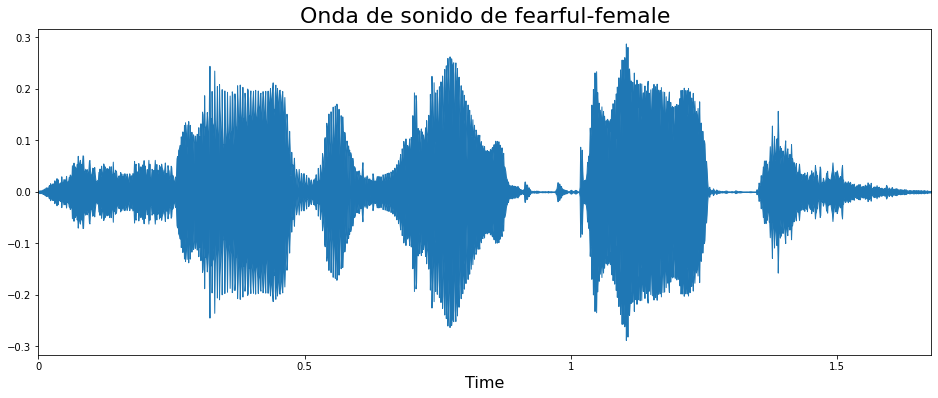

In [12]:
# Variable para escoger valor aleatorio
num = np.random.randint(0, len(TESS_df))

# Utilizaremos librosa para cargar el audio y generar el gráfico de las ondas de sonido
filename = TESS_df.path[num]
data, sampling_rate = librosa.load(filename, sr = 44100) 

# Gráfico

plt.figure(figsize=(16, 6))
emot = TESS_df['emotion_gender'][num]
plt.title(f'Onda de sonido de {emot}', size = 22)
plt.xlabel('Time', size = 16)
librosa.display.waveplot(data, sr= sampling_rate)
plt.show()



Ahora mostraremos la amplitud  y frecuencia del sonido en el dominio del tiempo frecuencia, para ello utilizaremos la transformación de Fourier y la transformaremos a decibélios para poder visualizar mejor los datos. 

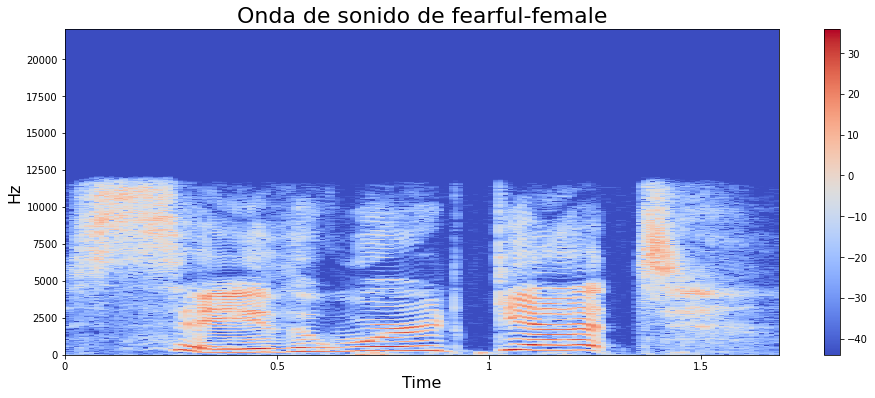

In [13]:
# Transformación Fourier 

F = librosa.stft(data)

# Transformación en decibélios en valor absoluto
Fdb = librosa.amplitude_to_db(abs(F))

plt.figure(figsize=(16, 6))
librosa.display.specshow(Fdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar()
plt.xlabel('Time', size = 16)
plt.ylabel('Hz', size = 16)
plt.title(f'Onda de sonido de {emot}', size = 22)
plt.show()

### Juntamos los tres datasets en uno.

Pero para ello, primero tenemos que eliminar las columnas que no nos comparten las tres bases de datos.

In [14]:
# Eliminamos las columnas modality, channel, intensity y sentence del dataset RAVDESS

RAVDESS_df = RAVDESS_df.drop(['modality', 'channel', 'intensity', 'sentence'], axis = 1)
RAVDESS_df

emotion   actor  ...   source  emotion_gender
0         happy  female  ...  RAVDESS    happy-female
1           sad  female  ...  RAVDESS      sad-female
2     surprised    male  ...  RAVDESS  surprised-male
3       disgust    male  ...  RAVDESS    disgust-male
4         happy  female  ...  RAVDESS    happy-female
...         ...     ...  ...      ...             ...
1435    disgust    male  ...  RAVDESS    disgust-male
1436  surprised    male  ...  RAVDESS  surprised-male
1437        sad  female  ...  RAVDESS      sad-female
1438    disgust    male  ...  RAVDESS    disgust-male
1439      angry  female  ...  RAVDESS    angry-female

[1440 rows x 5 columns]

Ahora ya podemos concatenar los tres datasets

In [15]:
df = pd.concat([RAVDESS_df, SAVEE_df, TESS_df], ignore_index=True)
df

emotion   actor  ...   source  emotion_gender
0         happy  female  ...  RAVDESS    happy-female
1           sad  female  ...  RAVDESS      sad-female
2     surprised    male  ...  RAVDESS  surprised-male
3       disgust    male  ...  RAVDESS    disgust-male
4         happy  female  ...  RAVDESS    happy-female
...         ...     ...  ...      ...             ...
4715      happy  female  ...     TESS    happy-female
4716      happy  female  ...     TESS    happy-female
4717    fearful  female  ...     TESS  fearful-female
4718        sad  female  ...     TESS      sad-female
4719    neutral  female  ...     TESS  neutral-female

[4720 rows x 5 columns]

### Analizamos los datos

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4720 entries, 0 to 4719
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   emotion         4720 non-null   object
 1   actor           4720 non-null   object
 2   path            4720 non-null   object
 3   source          4720 non-null   object
 4   emotion_gender  4720 non-null   object
dtypes: object(5)
memory usage: 184.5+ KB


Una vez creado el dataset único, vamos a ver como se balancean los datos y si hay datos pérdidos.

In [17]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())

emotion
happy        652
sad          652
surprised    652
disgust      652
angry        652
fearful      652
neutral      616
calm         192
Name: emotion, dtype: int64
actor
female    3520
male      1200
Name: actor, dtype: int64
path
/gdrive/MyDrive/TFM/RAVDESS//03-01-03-02-01-02-08.wav    1
/gdrive/MyDrive/TFM/TESS/OAF_search_angry.wav            1
/gdrive/MyDrive/TFM/TESS/OAF_seize_fear.wav              1
/gdrive/MyDrive/TFM/TESS/OAF_sell_disgust.wav            1
/gdrive/MyDrive/TFM/TESS/OAF_seize_neutral.wav           1
                                                        ..
/gdrive/MyDrive/TFM/SAVEE/JE_a13.wav                     1
/gdrive/MyDrive/TFM/SAVEE/JE_a12.wav                     1
/gdrive/MyDrive/TFM/SAVEE/JE_a11.wav                     1
/gdrive/MyDrive/TFM/SAVEE/JE_a10.wav                     1
/gdrive/MyDrive/TFM/TESS/OAF_numb_neutral.wav            1
Name: path, Length: 4720, dtype: int64
source
TESS       2800
RAVDESS    1440
SAVEE       480
Name: source, dtyp

Vemos que no hay datos pérdidos, así que podemos analizar el balanceo de los datos y para ello, procederemos a representarlos en gráficos para que se puedan apreciar mejor.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


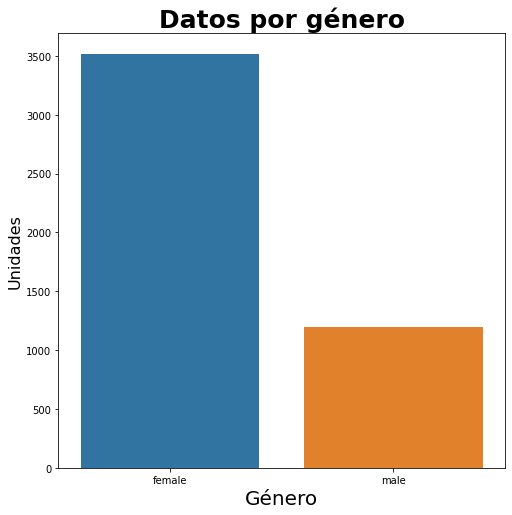

In [18]:
# Genero
plt.figure(figsize= (8,8))
plt.title('Datos por género', size = 25, weight = 'bold')
sns.countplot(df.actor)
plt.xlabel('Género',size = 20)
plt.ylabel('Unidades', size = 16)


plt.show()

Claramente vemos que tenemos más datos femeninos que masculinos, esto probablemente generará que el modelo predija mejor los audios femeninos a los masculinos.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


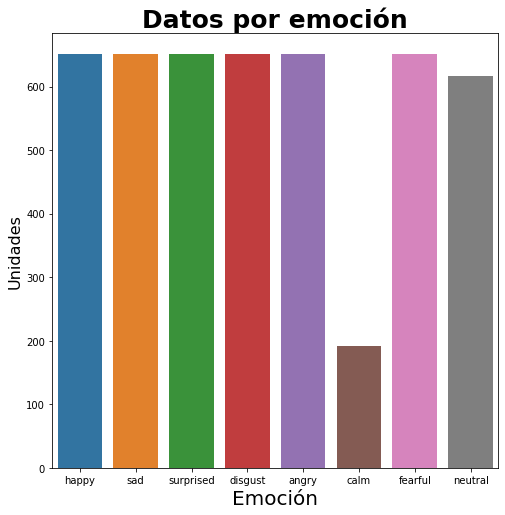

In [19]:
# Genero
plt.figure(figsize= (8,8))
plt.title('Datos por emoción', size = 25, weight = 'bold')
sns.countplot(df.emotion)
plt.xlabel('Emoción',size = 20)
plt.ylabel('Unidades', size = 16)


plt.show()

Podemos ver que los datos por emociones son bastante similares sin contar que para calm tenemos pocos datos con respecto a los anteriores. Con la modelación valoraremos si quitamos o no esta emoción para mejorar la predicción.

Ahora analizaremos los segundos de los audios a ver si son similares o no.



In [20]:
# Utilizaremos librosa para cargar el audio y calcular los segundos de cada audio
duration = []
for i in range(0, len(df)):
    filename = df.path[i]
    data, sampling_rate = librosa.load(filename, sr = 44100) #sr=frecuencia
    dur = librosa.get_duration(data, sr= sampling_rate)
    duration.append(dur)

In [21]:
df['duration'] = duration

Añadimos los datos de la duración al dataset

In [22]:
df

emotion   actor  ...  emotion_gender  duration
0         happy  female  ...    happy-female  3.903900
1           sad  female  ...      sad-female  3.603605
2     surprised    male  ...  surprised-male  3.436780
3       disgust    male  ...    disgust-male  4.404399
4         happy  female  ...    happy-female  3.837188
...         ...     ...  ...             ...       ...
4715      happy  female  ...    happy-female  2.152132
4716      happy  female  ...    happy-female  2.023696
4717    fearful  female  ...  fearful-female  1.561043
4718        sad  female  ...      sad-female  2.496213
4719    neutral  female  ...  neutral-female  1.938209

[4720 rows x 6 columns]

Ahora vamos analizar la distribución de la duración de todos los audios ya que concretamente en la extracción de caracteríticas con el método MFCC es necesario que sean iguales para que se pueda modelar bien.

In [23]:
df['duration'].describe()

count    4720.000000
mean        2.738624
std         0.946811
min         1.254082
25%         1.982954
50%         2.388946
75%         3.570249
max         7.138730
Name: duration, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


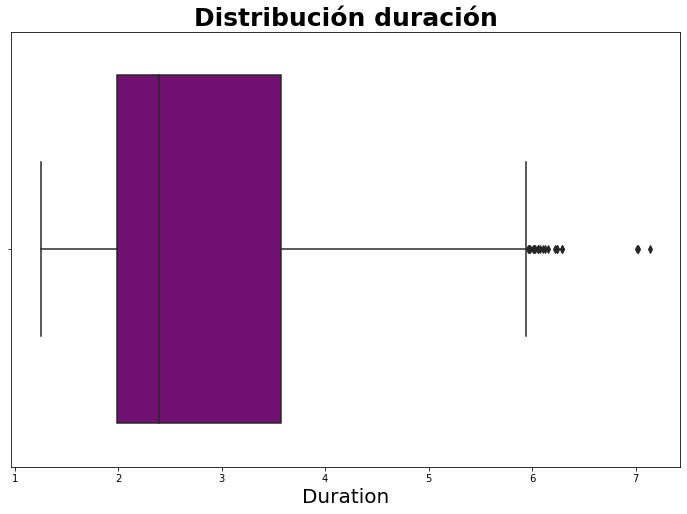

In [24]:
plt.figure(figsize= (12,8))
plt.title('Distribución duración', size = 25, weight = 'bold')
sns.boxplot(df['duration'], color = 'purple')
plt.xlabel('Duration', size = 20)
plt.show()

Probablemente podemos pensar que todos los datos que rondan los 6 segundos y lo pasan son outliers. Vamos a ver cuantas observaciones podrían ser outliers para quitarlas del dataset utilizando los intercuartiles y el rango intercuartilico.

In [25]:
# Cálculo intercuartiles
Q1 = np.percentile(df['duration'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['duration'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print( Q1, Q3, IQR)

1.982891156462585 3.570249433106576 1.5873582766439909


In [26]:
# Por encima del tercer intercuartil
upper = df['duration'] >= (Q3+1.5*IQR)
up = np.where(upper)
up



(array([1573, 1574, 1585, 1654, 1663, 1664, 1678, 1693, 1706, 1707, 1779,
        1780, 1781, 1783, 1786, 1824, 1854, 1869, 1892, 1897]),)

In [27]:
df_up = df.iloc[up]
df_up

emotion actor  ...  emotion_gender  duration
1573      angry  male  ...      angry-male  7.024830
1574      angry  male  ...      angry-male  6.106916
1585    disgust  male  ...    disgust-male  6.032744
1654        sad  male  ...        sad-male  6.005782
1663        sad  male  ...        sad-male  6.242766
1664        sad  male  ...        sad-male  7.138730
1678  surprised  male  ...  surprised-male  6.129501
1693      angry  male  ...      angry-male  5.957075
1706    disgust  male  ...    disgust-male  6.289297
1707    disgust  male  ...    disgust-male  7.012585
1779        sad  male  ...        sad-male  6.058707
1780        sad  male  ...        sad-male  6.079683
1781        sad  male  ...        sad-male  6.016757
1783        sad  male  ...        sad-male  6.242132
1786  surprised  male  ...  surprised-male  6.289297
1824    disgust  male  ...    disgust-male  6.055782
1854      happy  male  ...      happy-male  5.974830
1869    neutral  male  ...    neutral-male  6.156599
1892        sad  male  ...        sad-male  5.983651
1897        sad  male  ...        sad-male  6.226417

[20 rows x 6 columns]

In [28]:
df_up = df_up.reset_index() # para poder representar estos datos con for es necesario que los indices sean continuos
df_up

index    emotion actor  ... source  emotion_gender  duration
0    1573      angry  male  ...  SAVEE      angry-male  7.024830
1    1574      angry  male  ...  SAVEE      angry-male  6.106916
2    1585    disgust  male  ...  SAVEE    disgust-male  6.032744
3    1654        sad  male  ...  SAVEE        sad-male  6.005782
4    1663        sad  male  ...  SAVEE        sad-male  6.242766
5    1664        sad  male  ...  SAVEE        sad-male  7.138730
6    1678  surprised  male  ...  SAVEE  surprised-male  6.129501
7    1693      angry  male  ...  SAVEE      angry-male  5.957075
8    1706    disgust  male  ...  SAVEE    disgust-male  6.289297
9    1707    disgust  male  ...  SAVEE    disgust-male  7.012585
10   1779        sad  male  ...  SAVEE        sad-male  6.058707
11   1780        sad  male  ...  SAVEE        sad-male  6.079683
12   1781        sad  male  ...  SAVEE        sad-male  6.016757
13   1783        sad  male  ...  SAVEE        sad-male  6.242132
14   1786  surprised  male  ...  SAVEE  surprised-male  6.289297
15   1824    disgust  male  ...  SAVEE    disgust-male  6.055782
16   1854      happy  male  ...  SAVEE      happy-male  5.974830
17   1869    neutral  male  ...  SAVEE    neutral-male  6.156599
18   1892        sad  male  ...  SAVEE        sad-male  5.983651
19   1897        sad  male  ...  SAVEE        sad-male  6.226417

[20 rows x 7 columns]

In [29]:
# Por debajo del primer intercuartil
lower = df['duration'] <= (Q1-1.5*IQR)
print(np.where(lower))

(array([], dtype=int64),)


Podemos ver que por encima hay 20 registros que se consideran outliers, en cambio por debajo no lo hay.

Para esos 20 vamos a ver a onda de sonido para ver que no sean errores de grabación con lo que podríamos acortar la duración sin tener que sacar estos datos del dataset ya que son todas las observaciones del género masculino y como son de las que menos hay vamos a intentar ver si no las tenemos que quitar porque el audio tenga unos segundos sin sonido en el final.

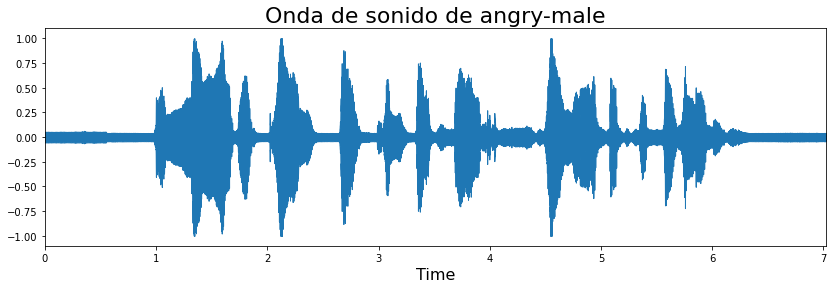

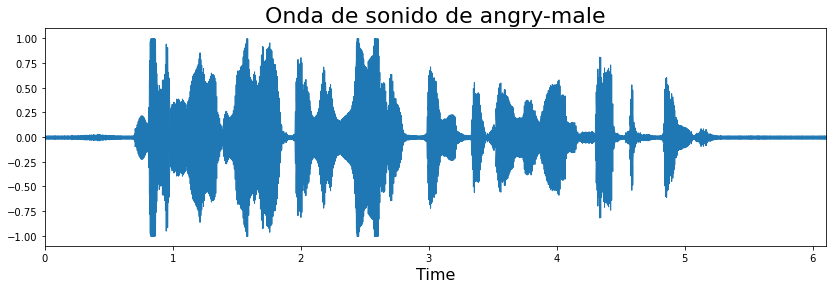

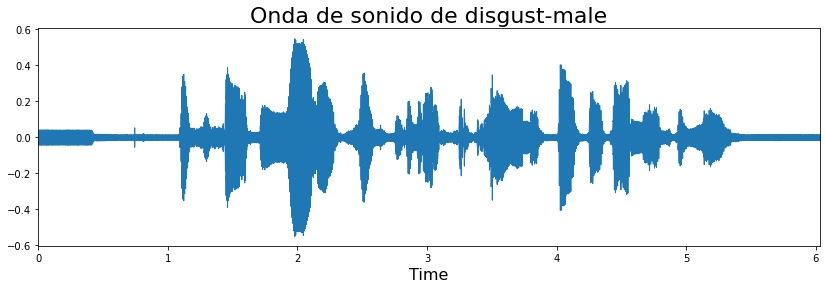

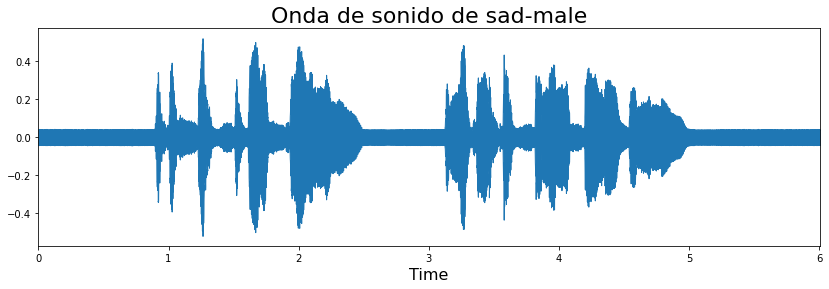

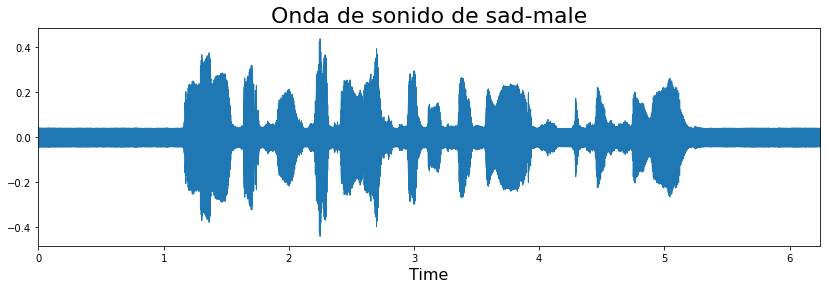

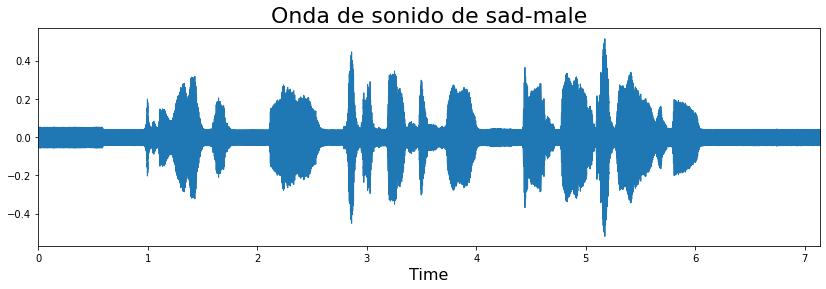

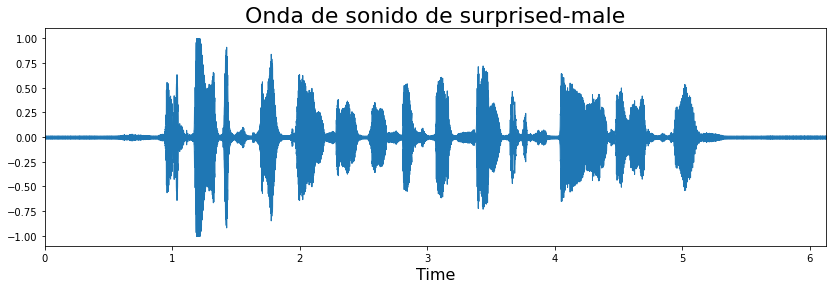

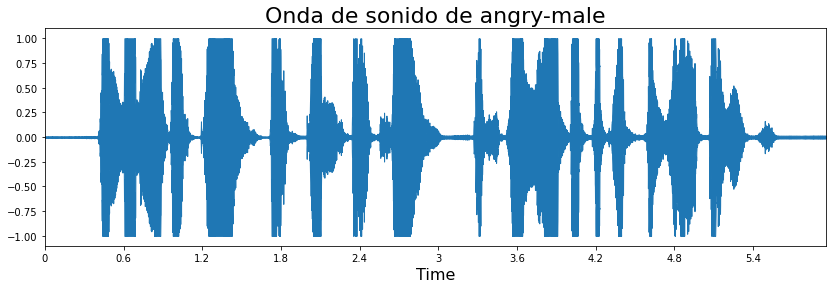

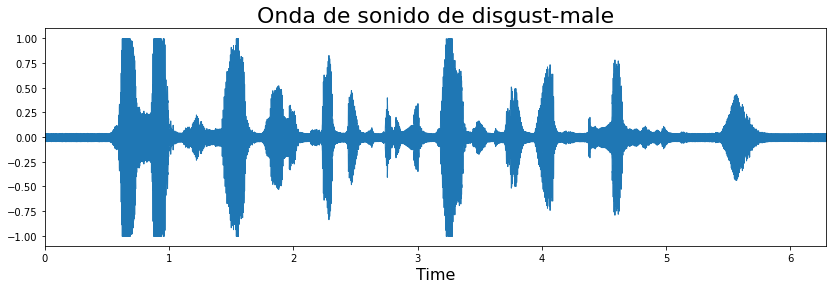

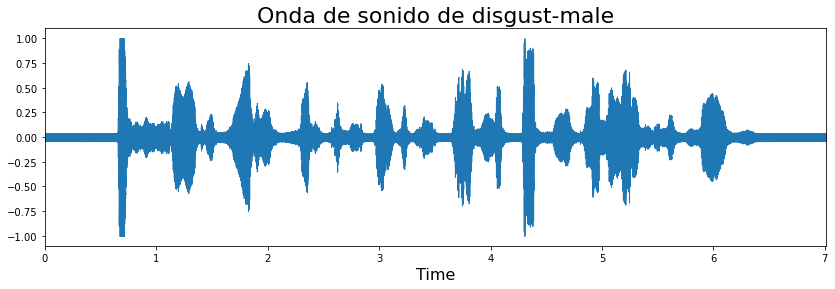

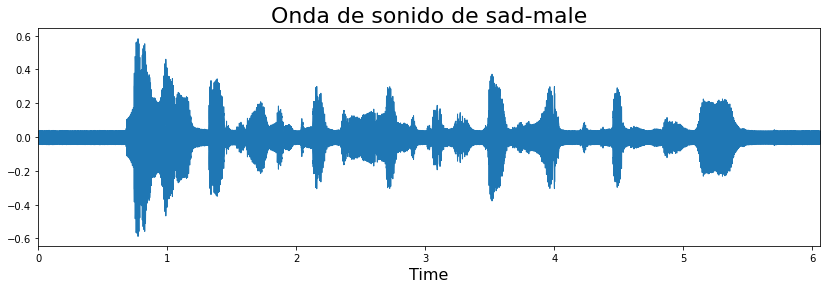

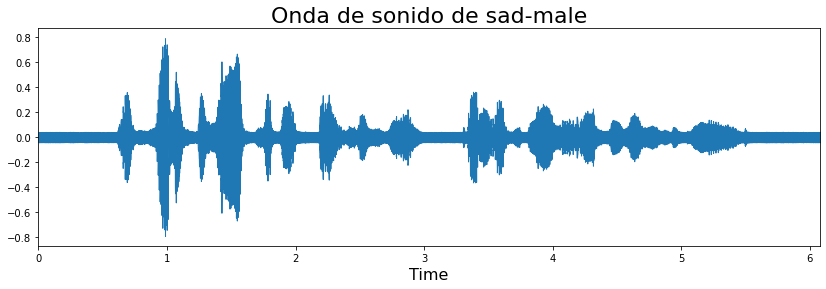

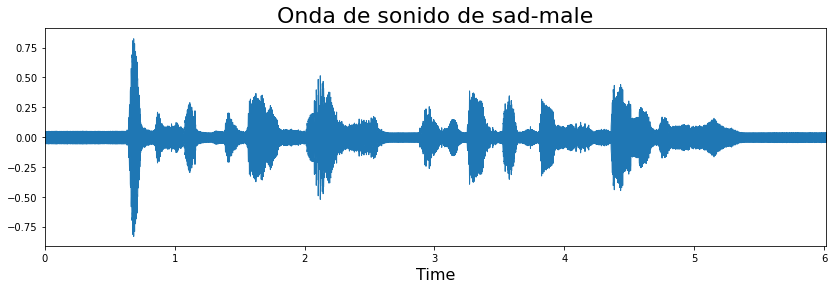

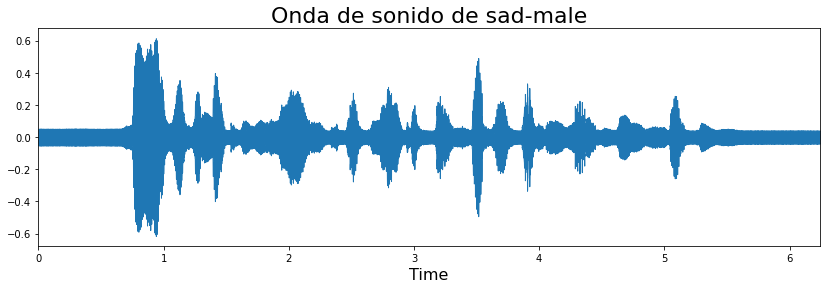

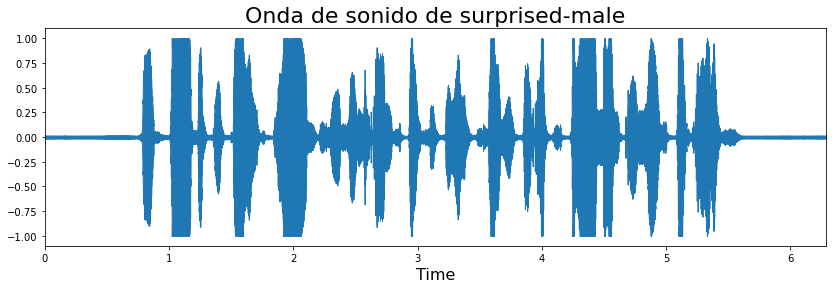

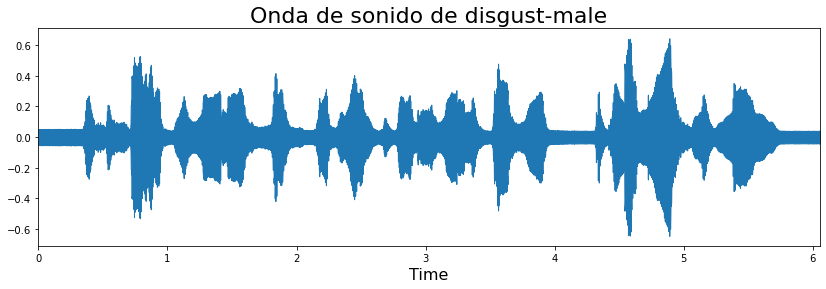

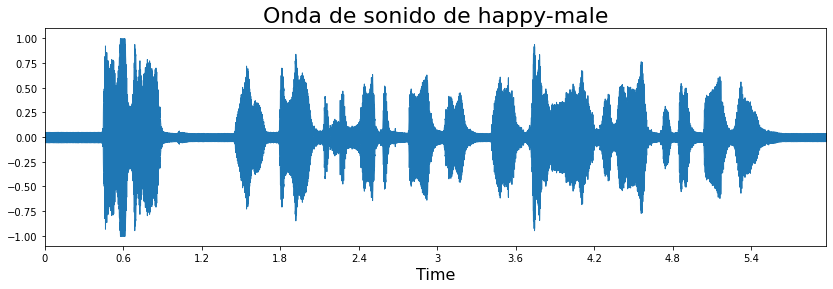

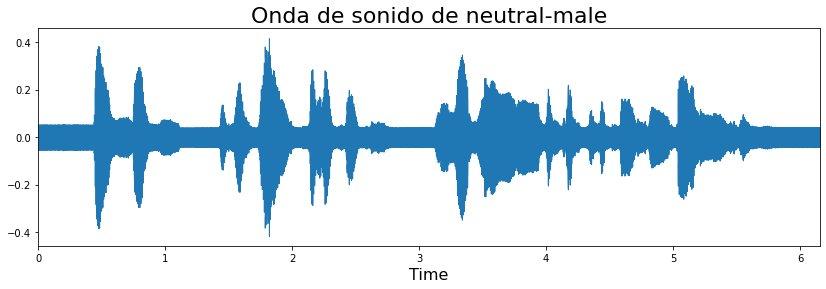

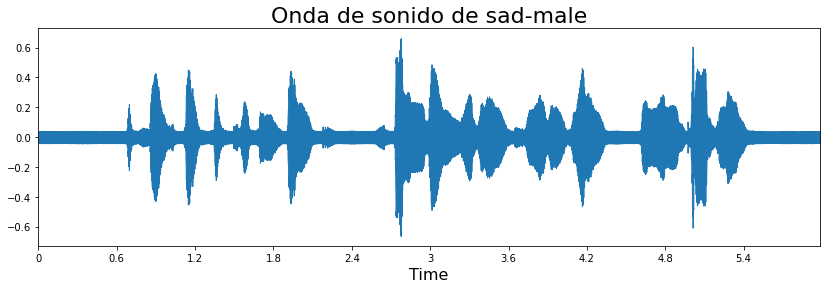

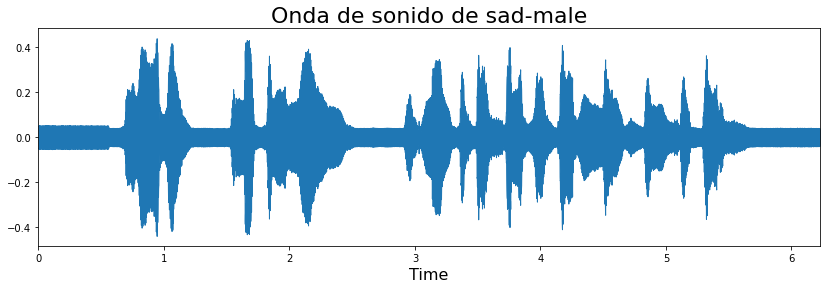

In [30]:
# Utilizaremos librosa para cargar el audio y generar el gráfico de las ondas de sonido
for i in range(0, len(df_up)):
    filename = df_up.path[i]
    data, sampling_rate = librosa.load(filename, sr = 44100) 
    # Gráfico

    plt.figure(figsize=(14, 4))
    emot = df_up['emotion_gender'][i]
    plt.title(f'Onda de sonido de {emot}', size = 22)
    plt.xlabel('Time', size = 16)
    librosa.display.waveplot(data, sr= sampling_rate)
    plt.show()

Vemos que hay algún segundo vacío al inicio y al final de los audios, para ello vamos a intentar quitar los silencios iniciales y finales de todos los datos a ver si así se reducen los outliers

In [31]:
dur_trim =[]
for i in range(0, len(df)):
    filename = df.path[i]
    data, sampling_rate = librosa.load(filename, sr = 44100) 
    data2, index = librosa.effects.trim(data)
    dur = librosa.get_duration(data2, sr= sampling_rate)
    dur_trim.append(dur)

df['duration_trim'] = dur_trim
df

emotion   actor  ...  duration duration_trim
0         happy  female  ...  3.903900      3.738413
1           sad  female  ...  3.603605      3.603605
2     surprised    male  ...  3.436780      3.181134
3       disgust    male  ...  4.404399      3.982222
4         happy  female  ...  3.837188      3.744308
...         ...     ...  ...       ...           ...
4715      happy  female  ...  2.152132      2.152132
4716      happy  female  ...  2.023696      2.023696
4717    fearful  female  ...  1.561043      1.561043
4718        sad  female  ...  2.496213      2.496213
4719    neutral  female  ...  1.938209      1.938209

[4720 rows x 7 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


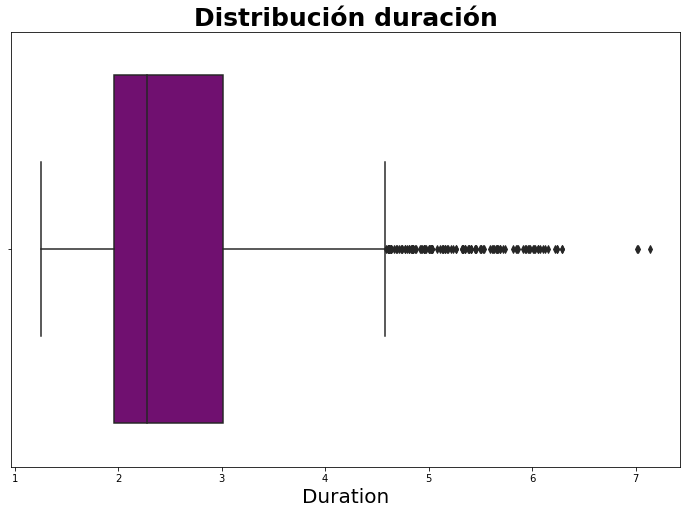

In [32]:
plt.figure(figsize= (12,8))
plt.title('Distribución duración', size = 25, weight = 'bold')
sns.boxplot(df['duration_trim'], color = 'purple')
plt.xlabel('Duration', size = 20)
plt.show()

In [33]:
# Calculo intercuartiles
Q1 = np.percentile(df['duration_trim'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['duration_trim'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print( Q1, Q3, IQR)

1.9620068027210884 3.0102267573696144 1.048219954648526


In [34]:
# Por encima del tercer intercuartil
upper = df['duration_trim'] >= (Q3+1.5*IQR)
up = np.where(upper)
up



(array([ 569,  675,  690,  710,  712,  925, 1075, 1218, 1251, 1321, 1352,
        1438, 1451, 1465, 1480, 1483, 1495, 1496, 1498, 1499, 1501, 1510,
        1511, 1512, 1514, 1524, 1525, 1556, 1559, 1568, 1569, 1572, 1573,
        1574, 1585, 1586, 1587, 1597, 1600, 1602, 1604, 1609, 1615, 1617,
        1618, 1619, 1633, 1634, 1637, 1647, 1648, 1650, 1654, 1655, 1656,
        1657, 1658, 1663, 1664, 1672, 1675, 1676, 1678, 1679, 1692, 1693,
        1694, 1695, 1705, 1706, 1707, 1717, 1720, 1722, 1723, 1735, 1736,
        1738, 1739, 1750, 1753, 1754, 1767, 1768, 1769, 1770, 1774, 1779,
        1780, 1781, 1782, 1783, 1786, 1787, 1789, 1798, 1799, 1800, 1810,
        1811, 1820, 1824, 1825, 1826, 1839, 1840, 1854, 1855, 1857, 1858,
        1869, 1872, 1873, 1885, 1886, 1888, 1892, 1897, 1898, 1899, 1900,
        1901, 1902, 1914, 1916, 1917]),)

Vemos que haciendo esto se generan más outliers, asi que devolveremos la base de datos a su estado inicial.

In [35]:
df = df.drop(['duration_trim'], axis = 1)
df

emotion   actor  ...  emotion_gender  duration
0         happy  female  ...    happy-female  3.903900
1           sad  female  ...      sad-female  3.603605
2     surprised    male  ...  surprised-male  3.436780
3       disgust    male  ...    disgust-male  4.404399
4         happy  female  ...    happy-female  3.837188
...         ...     ...  ...             ...       ...
4715      happy  female  ...    happy-female  2.152132
4716      happy  female  ...    happy-female  2.023696
4717    fearful  female  ...  fearful-female  1.561043
4718        sad  female  ...      sad-female  2.496213
4719    neutral  female  ...  neutral-female  1.938209

[4720 rows x 6 columns]

### Extracción de las características 

Extraemos las características MFCC, Chroma, Melspectograma y el contraste espectral.

In [36]:
# función para sacar todas las características

def extract_feature(filename, mfcc, chroma, mel, contrast):
  """ Introduciremos la base de datos y las características que queremos sacar
  filename =  datos
  mfcc = si es True calculará las características de mfcc
  chroma = si es True calculará las características de chroma
  mel = si es True calculará las características de espectograma de mel-scaled
  contrast = si es True calculará las características de contraste espectral

  return: array con resultados

  """
  data, sampling_rate = librosa.load(filename, sr = 44100)
    if chroma:
    #Transformada de Fourier (STFT) para poder sacar las caracterísitcas Chroma y el contraste espectral
    stft = np.abs(librosa.stft(data))
    result = np.array([])
  
    if mfcc:
    #Media de las características MFCC
    mfcc = np.mean(librosa.feature.mfcc(data, sr = sampling_rate, n_mfcc= 20).T, axis = 0) 
    result = np.hstack((result, mfcc))

    if chroma:
    #Media de las características Chroma
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sampling_rate).T, axis = 0) 
    result = np.hstack((result, chroma))

    if mel:
    #Media Espectograma de mel-scaled 
    mel = np.mean(librosa.feature.melspectrogram(data, sr=sampling_rate).T, axis = 0)
    result = np.hstack((result, mel))
  
    if contrast:
    #Media Contraste espectral
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sampling_rate).T, axis = 0)
    result = np.hstack((result, contrast))
  
  return result

### Función de carga de datos para modelar

In [37]:
def load_data(test_size = 0.2):
  """ Función para cargar los datos y sacar las características necesarias para
  poder modelar generando la separación de train y test.
  test_size = porcentaje de datos que irán a la parte de test.
  
  return: separación de los datos en train y test
  """
    X = []
    y = []
    for i in range(0, len(df)):
    filename = df.path[i]
    data, sampling_rate = librosa.load(filename, sr = 44100, duration = 5)
    emotion = df['emotion_gender'][i]
    y.append(emotion)
    features = extract_feature(filename, mfcc = True, chroma = True, mel = True, contrast = True)
    X.append(features)
    return train_test_split(np.array(X), np.array(y), test_size = test_size, random_state = 16) 


## Modelar

Utilizamos CNN para modelar

Empezamos separando en train y test el dataset

In [38]:
# Separar train y test
X_train, X_test, y_train, y_test = load_data(test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3776, 167), (944, 167), (3776,), (944,))

Tenemos que transformar a categórica los valores objetivo

In [39]:
X_train1 = X_train
y_train1 = y_train
X_test1 = X_test
y_test1 = y_test

lb = LabelEncoder()

y_train1 = np_utils.to_categorical(lb.fit_transform(y_train1))
y_test1 = np_utils.to_categorical(lb.fit_transform(y_test1))

Para utilizar CNN como ha de tener 3 dimensiones creamos una adicional para las características

In [40]:
X_traincnn = np.expand_dims(X_train1, axis = 2)
X_testcnn = np.expand_dims(X_test1, axis = 2)

X_traincnn.shape


(3776, 167, 1)

### Modelo 1

In [41]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(167,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(16))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 167, 256)          1536      
                                                                 
 activation (Activation)     (None, 167, 256)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 167, 128)          163968    
                                                                 
 activation_1 (Activation)   (None, 167, 128)          0         
                                                                 
 dropout (Dropout)           (None, 167, 128)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 20, 128)          0         
 )                                                               
                                                        

In [42]:
model.compile(loss='categorical_crossentropy', optimizer= 'rmsprop',metrics=['accuracy'])

In [43]:
cnnhistory=model.fit(X_traincnn, y_train1, batch_size=16, epochs=250, validation_data=(X_testcnn, y_test1))

Epoch 1/250
236/236 [==============================] - 24s 96ms/step - loss: 1.9482 - accuracy: 0.3898 - val_loss: 1.2679 - val_accuracy: 0.5540
Epoch 2/250
236/236 [==============================] - 22s 93ms/step - loss: 0.9996 - accuracy: 0.6541 - val_loss: 0.9365 - val_accuracy: 0.6674
Epoch 3/250
236/236 [==============================] - 22s 93ms/step - loss: 0.8172 - accuracy: 0.7084 - val_loss: 0.8383 - val_accuracy: 0.7129
Epoch 4/250
236/236 [==============================] - 22s 93ms/step - loss: 0.7196 - accuracy: 0.7439 - val_loss: 0.7885 - val_accuracy: 0.7193
Epoch 5/250
236/236 [==============================] - 22s 93ms/step - loss: 0.6503 - accuracy: 0.7680 - val_loss: 0.7040 - val_accuracy: 0.7595
Epoch 6/250
236/236 [==============================] - 22s 94ms/step - loss: 0.5859 - accuracy: 0.7908 - val_loss: 0.6725 - val_accuracy: 0.7468
Epoch 7/250
236/236 [==============================] - 22s 93ms/step - loss: 0.5287 - accuracy: 0.8151 - val_loss: 0.6252 - val_ac

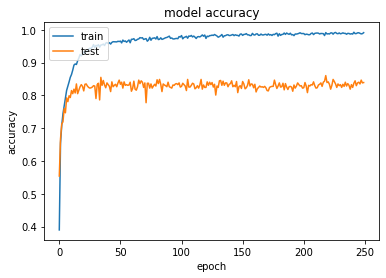

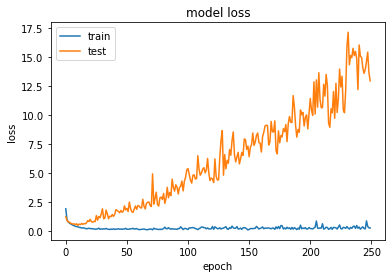

In [44]:
#Accuracy
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#Loss
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
#predicción 
y_pred1 = model.predict(X_testcnn)
# Cambiamos los valores categoricos a los valores en nombre
preds1=y_pred1.argmax(axis=1)
abc = preds1.astype(int).flatten()
predictions = (lb.inverse_transform((abc)))

preddf1 = pd.DataFrame({'predictedvalues': predictions})
preddf1

predictedvalues
0      fearful-female
1    surprised-female
2           calm-male
3         calm-female
4        happy-female
..                ...
939  surprised-female
940      neutral-male
941      neutral-male
942  surprised-female
943      angry-female

[944 rows x 1 columns]

In [46]:
# Calculo accuracy con la predicción
accuracy1 = accuracy_score(y_true = y_test, y_pred = preddf1)

print('Accuracy: {:.2f}%'.format(accuracy1*100))

Accuracy: 83.90%


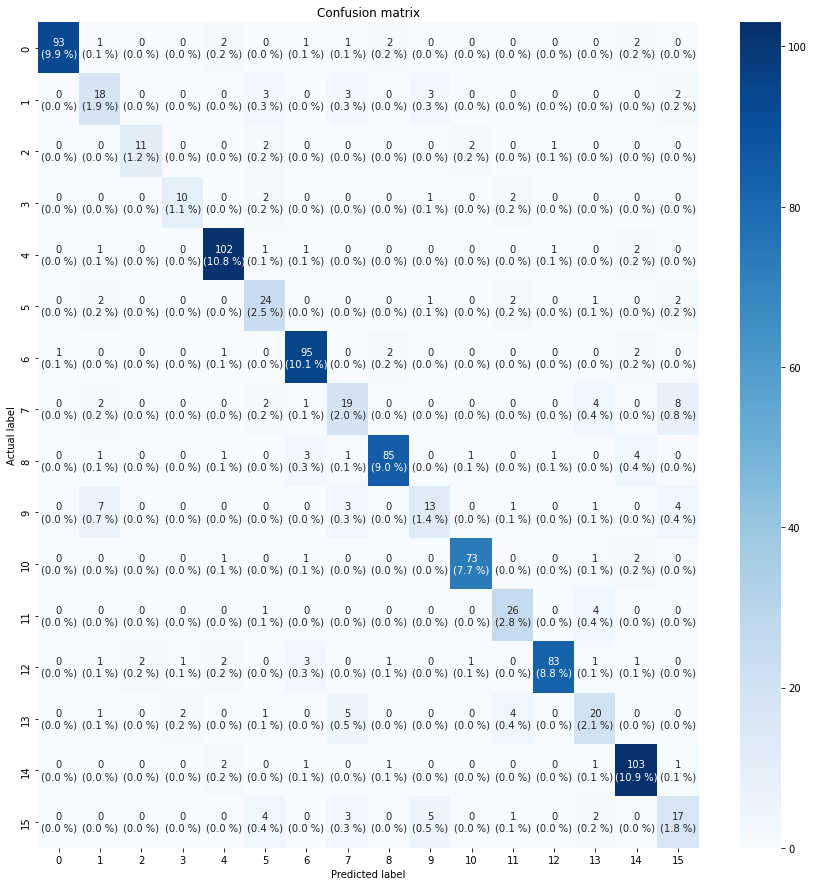

In [47]:
cnf_matrix1 = confusion_matrix(y_test, preddf1)

plt.figure(figsize=(12, 12))
group_counts = [f'{value:0.0f}' for value in cnf_matrix1.flatten()]
group_percentages = [f'{100 * value:0.1f} %' for value in 
                      cnf_matrix1.flatten()/np.sum(cnf_matrix1)]
labels = [f'{v1}\n({v2})' for v1, v2 in
          zip(group_counts,group_percentages)]
n = int(np.sqrt(len(labels)))
labels = np.asarray(labels).reshape(n,n)
sns.heatmap(cnf_matrix1, annot=labels, fmt='', cmap='Blues')

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Modelo 2

In [48]:
model2 = Sequential()

model2.add(Conv1D(256, 5,padding='same',
                 input_shape=(167,1)))
model2.add(Activation('relu'))
model2.add(Conv1D(128, 5,padding='same'))
model2.add(Activation('relu'))
model2.add(Dropout(0.1))
model2.add(MaxPooling1D(pool_size=(8)))
model2.add(Conv1D(128, 5,padding='same',))
model2.add(Activation('relu'))
model2.add(Conv1D(128, 5,padding='same',))
model2.add(Activation('relu'))
model2.add(Flatten())
model2.add(Dense(16))
model2.add(Activation('softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 167, 256)          1536      
                                                                 
 activation_5 (Activation)   (None, 167, 256)          0         
                                                                 
 conv1d_5 (Conv1D)           (None, 167, 128)          163968    
                                                                 
 activation_6 (Activation)   (None, 167, 128)          0         
                                                                 
 dropout_1 (Dropout)         (None, 167, 128)          0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 20, 128)          0         
 1D)                                                             
                                                      

In [49]:
model2.compile(loss='categorical_crossentropy', optimizer= 'adam',metrics=['accuracy'])

In [50]:
cnnhistory2=model2.fit(X_traincnn, y_train1, batch_size=16, epochs=250, validation_data=(X_testcnn, y_test1))

Epoch 1/250
236/236 [==============================] - 22s 92ms/step - loss: 1.9916 - accuracy: 0.3607 - val_loss: 1.5183 - val_accuracy: 0.5307
Epoch 2/250
236/236 [==============================] - 21s 91ms/step - loss: 1.0860 - accuracy: 0.6367 - val_loss: 0.9833 - val_accuracy: 0.6377
Epoch 3/250
236/236 [==============================] - 22s 93ms/step - loss: 0.8628 - accuracy: 0.6936 - val_loss: 0.8808 - val_accuracy: 0.6695
Epoch 4/250
236/236 [==============================] - 21s 91ms/step - loss: 0.7591 - accuracy: 0.7214 - val_loss: 0.7878 - val_accuracy: 0.7013
Epoch 5/250
236/236 [==============================] - 22s 91ms/step - loss: 0.6947 - accuracy: 0.7521 - val_loss: 0.7246 - val_accuracy: 0.7299
Epoch 6/250
236/236 [==============================] - 21s 91ms/step - loss: 0.6630 - accuracy: 0.7569 - val_loss: 0.7420 - val_accuracy: 0.7182
Epoch 7/250
236/236 [==============================] - 21s 90ms/step - loss: 0.5907 - accuracy: 0.7834 - val_loss: 0.6410 - val_ac

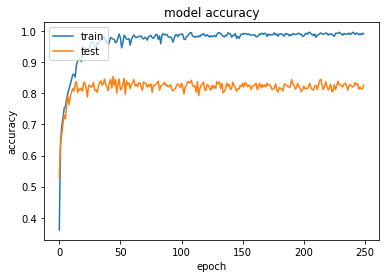

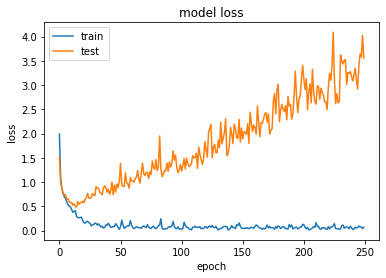

In [51]:
#Accuracy
plt.plot(cnnhistory2.history['accuracy'])
plt.plot(cnnhistory2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#Loss
plt.plot(cnnhistory2.history['loss'])
plt.plot(cnnhistory2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [52]:
#predicción 
y_pred2 = model2.predict(X_testcnn)
# Cambiamos los valores categoricos a los valores en nombre
preds2=y_pred2.argmax(axis=1)
abc = preds2.astype(int).flatten()
predictions2 = (lb.inverse_transform((abc)))

preddf2 = pd.DataFrame({'predictedvalues': predictions2})
preddf2

predictedvalues
0      fearful-female
1    surprised-female
2           calm-male
3      neutral-female
4        happy-female
..                ...
939  surprised-female
940      neutral-male
941          sad-male
942      angry-female
943      angry-female

[944 rows x 1 columns]

In [53]:
# Calculo accuracy con la predicción
accuracy2 = accuracy_score(y_true = y_test, y_pred = preddf2)

print('Accuracy: {:.2f}%'.format(accuracy2*100))

Accuracy: 82.63%


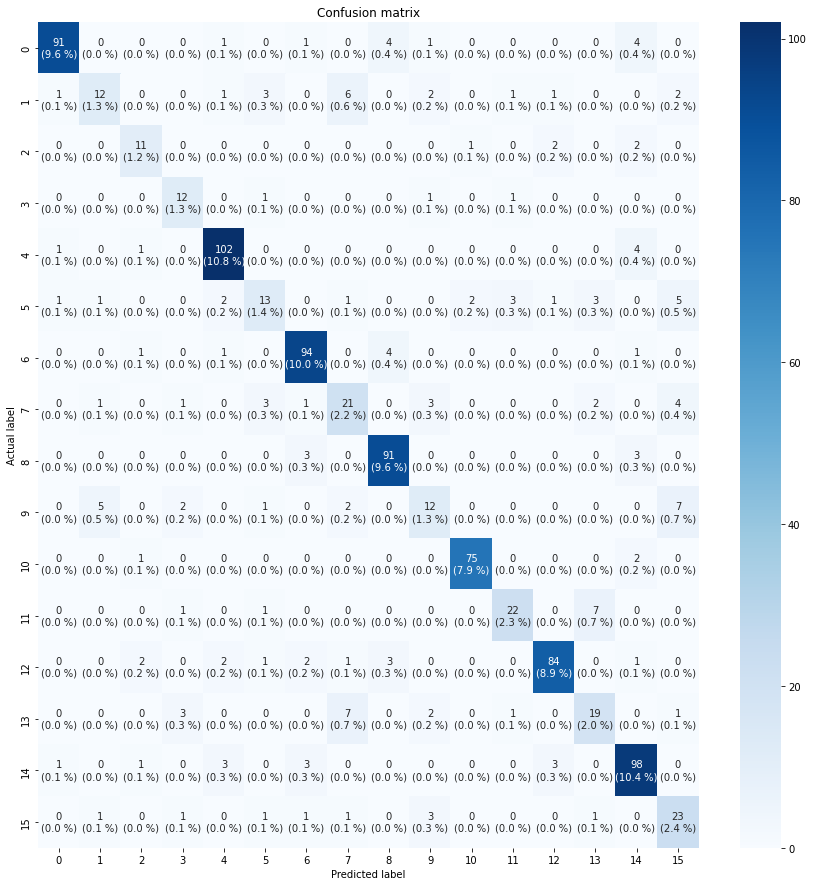

In [54]:
cnf_matrix2 = confusion_matrix(y_test, preddf2)

plt.figure(figsize=(12, 12))
group_counts = [f'{value:0.0f}' for value in cnf_matrix2.flatten()]
group_percentages = [f'{100 * value:0.1f} %' for value in 
                      cnf_matrix2.flatten()/np.sum(cnf_matrix2)]
labels = [f'{v1}\n({v2})' for v1, v2 in
          zip(group_counts,group_percentages)]
n = int(np.sqrt(len(labels)))
labels = np.asarray(labels).reshape(n,n)
sns.heatmap(cnf_matrix2, annot=labels, fmt='', cmap='Blues')

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Modelo 3

Como el primero da mejor resultado seguiremos con rmsprop pero pondremos callbacks

In [55]:
model3 = Sequential()

model3.add(Conv1D(256, 5,padding='same',
                 input_shape=(167,1)))
model3.add(Activation('relu'))
model3.add(Conv1D(128, 5,padding='same'))
model3.add(Activation('relu'))
model3.add(Dropout(0.1))
model3.add(MaxPooling1D(pool_size=(8)))
model3.add(Conv1D(128, 5,padding='same',))
model3.add(Activation('relu'))
model3.add(Conv1D(128, 5,padding='same',))
model3.add(Activation('relu'))
model3.add(Flatten())
model3.add(Dense(16))
model3.add(Activation('softmax'))
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=42,
                                              verbose=1)
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 167, 256)          1536      
                                                                 
 activation_10 (Activation)  (None, 167, 256)          0         
                                                                 
 conv1d_9 (Conv1D)           (None, 167, 128)          163968    
                                                                 
 activation_11 (Activation)  (None, 167, 128)          0         
                                                                 
 dropout_2 (Dropout)         (None, 167, 128)          0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 20, 128)          0         
 1D)                                                             
                                                      

In [56]:
model3.compile(loss='categorical_crossentropy', optimizer= 'rmsprop',metrics=['accuracy'])

In [57]:
cnnhistory3=model3.fit(X_traincnn, y_train1, batch_size=16, epochs=250, validation_data=(X_testcnn, y_test1), callbacks= [early_stop])

Epoch 1/250
236/236 [==============================] - 23s 95ms/step - loss: 1.9684 - accuracy: 0.3935 - val_loss: 1.1585 - val_accuracy: 0.6017
Epoch 2/250
236/236 [==============================] - 22s 94ms/step - loss: 0.9964 - accuracy: 0.6615 - val_loss: 0.9535 - val_accuracy: 0.6706
Epoch 3/250
236/236 [==============================] - 22s 94ms/step - loss: 0.8204 - accuracy: 0.7074 - val_loss: 0.7961 - val_accuracy: 0.6970
Epoch 4/250
236/236 [==============================] - 22s 93ms/step - loss: 0.7263 - accuracy: 0.7410 - val_loss: 0.7070 - val_accuracy: 0.7405
Epoch 5/250
236/236 [==============================] - 22s 93ms/step - loss: 0.6600 - accuracy: 0.7662 - val_loss: 0.7025 - val_accuracy: 0.7458
Epoch 6/250
236/236 [==============================] - 22s 93ms/step - loss: 0.5976 - accuracy: 0.7942 - val_loss: 0.6531 - val_accuracy: 0.7818
Epoch 7/250
236/236 [==============================] - 22s 93ms/step - loss: 0.5627 - accuracy: 0.7993 - val_loss: 0.6322 - val_ac

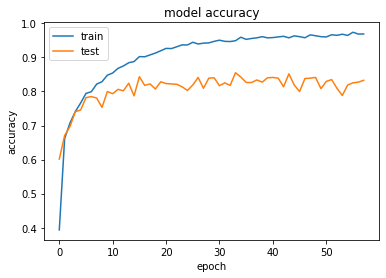

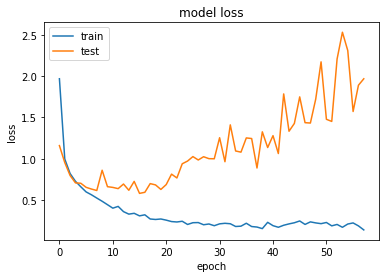

In [58]:
#Accuracy
plt.plot(cnnhistory3.history['accuracy'])
plt.plot(cnnhistory3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#Loss
plt.plot(cnnhistory3.history['loss'])
plt.plot(cnnhistory3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [59]:
#predicción 
y_pred3 = model3.predict(X_testcnn)
# Cambiamos los valores categoricos a los valores en nombre
preds3=y_pred3.argmax(axis=1)
abc = preds3.astype(int).flatten()
predictions3 = (lb.inverse_transform((abc)))

preddf3 = pd.DataFrame({'predictedvalues': predictions3})
preddf3

predictedvalues
0      fearful-female
1    surprised-female
2           calm-male
3      neutral-female
4        happy-female
..                ...
939  surprised-female
940      neutral-male
941      neutral-male
942  surprised-female
943      angry-female

[944 rows x 1 columns]

In [60]:
# Calculo accuracy con la predicción
accuracy3 = accuracy_score(y_true = y_test, y_pred = preddf3)

print('Accuracy: {:.2f}%'.format(accuracy3*100))

Accuracy: 83.26%


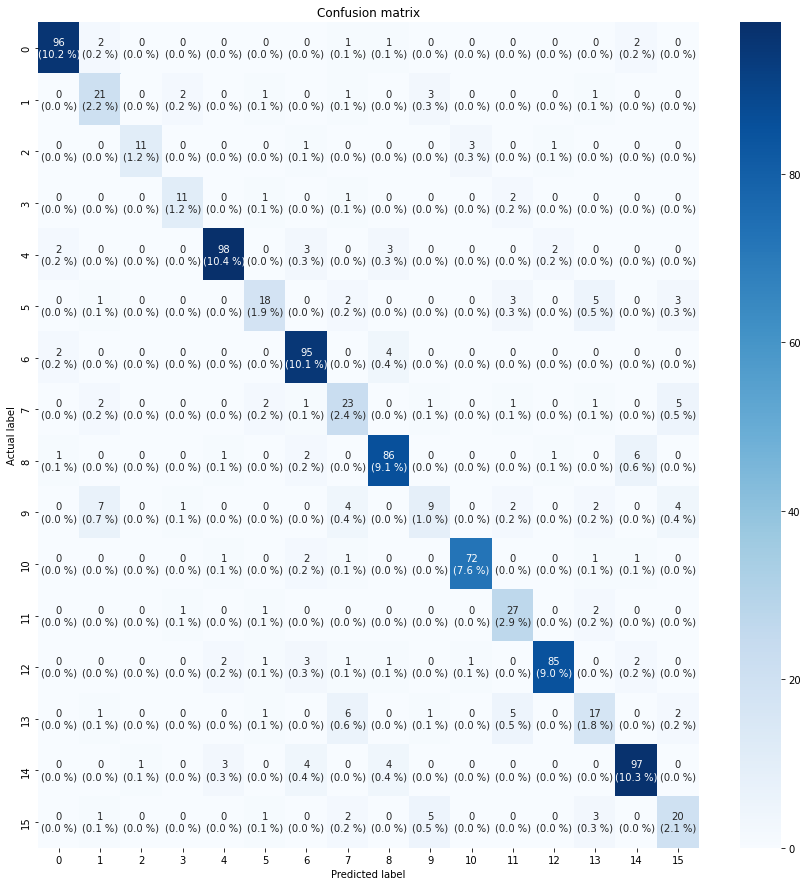

In [61]:
cnf_matrix3 = confusion_matrix(y_test, preddf3)

plt.figure(figsize=(12, 12))
group_counts = [f'{value:0.0f}' for value in cnf_matrix3.flatten()]
group_percentages = [f'{100 * value:0.1f} %' for value in 
                      cnf_matrix3.flatten()/np.sum(cnf_matrix3)]
labels = [f'{v1}\n({v2})' for v1, v2 in
          zip(group_counts,group_percentages)]
n = int(np.sqrt(len(labels)))
labels = np.asarray(labels).reshape(n,n)
sns.heatmap(cnf_matrix3, annot=labels, fmt='', cmap='Blues')

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Modelo 4 
Con el early stop no mejora, pero como tampoco empeora más que unas décimas lo dejamos y probamos el modelo 3 pero con AveragePooling en vez de MaxPooling

In [62]:
model4 = Sequential()

model4.add(Conv1D(256, 5,padding='same',
                 input_shape=(167,1)))
model4.add(Activation('relu'))
model4.add(Conv1D(128, 5,padding='same'))
model4.add(Activation('relu'))
model4.add(Dropout(0.1))
model4.add(AveragePooling1D(pool_size=(8)))
model4.add(Conv1D(128, 5,padding='same',))
model4.add(Activation('relu'))
model4.add(Conv1D(128, 5,padding='same',))
model4.add(Activation('relu'))
model4.add(Flatten())
model4.add(Dense(16))
model4.add(Activation('softmax'))
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=42,
                                              verbose=1)
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 167, 256)          1536      
                                                                 
 activation_15 (Activation)  (None, 167, 256)          0         
                                                                 
 conv1d_13 (Conv1D)          (None, 167, 128)          163968    
                                                                 
 activation_16 (Activation)  (None, 167, 128)          0         
                                                                 
 dropout_3 (Dropout)         (None, 167, 128)          0         
                                                                 
 average_pooling1d (AverageP  (None, 20, 128)          0         
 ooling1D)                                                       
                                                      

In [63]:
model4.compile(loss='categorical_crossentropy', optimizer= 'rmsprop',metrics=['accuracy'])

In [64]:
cnnhistory4=model4.fit(X_traincnn, y_train1, batch_size=16, epochs=250, validation_data=(X_testcnn, y_test1), callbacks= [early_stop])

Epoch 1/250
236/236 [==============================] - 24s 94ms/step - loss: 1.9244 - accuracy: 0.3575 - val_loss: 1.3312 - val_accuracy: 0.5498
Epoch 2/250
236/236 [==============================] - 22s 92ms/step - loss: 1.0717 - accuracy: 0.6390 - val_loss: 0.9931 - val_accuracy: 0.6525
Epoch 3/250
236/236 [==============================] - 22s 93ms/step - loss: 0.8479 - accuracy: 0.7058 - val_loss: 0.7951 - val_accuracy: 0.7044
Epoch 4/250
236/236 [==============================] - 22s 94ms/step - loss: 0.7411 - accuracy: 0.7426 - val_loss: 0.7082 - val_accuracy: 0.7373
Epoch 5/250
236/236 [==============================] - 22s 93ms/step - loss: 0.6670 - accuracy: 0.7609 - val_loss: 0.7692 - val_accuracy: 0.7394
Epoch 6/250
236/236 [==============================] - 22s 93ms/step - loss: 0.6033 - accuracy: 0.7842 - val_loss: 0.6928 - val_accuracy: 0.7595
Epoch 7/250
236/236 [==============================] - 22s 93ms/step - loss: 0.5607 - accuracy: 0.7995 - val_loss: 0.5726 - val_ac

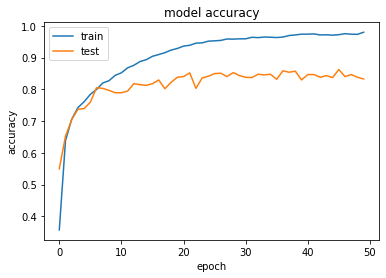

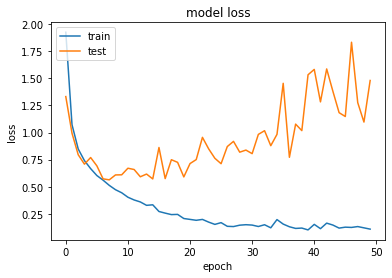

In [65]:
#Accuracy
plt.plot(cnnhistory4.history['accuracy'])
plt.plot(cnnhistory4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#Loss
plt.plot(cnnhistory4.history['loss'])
plt.plot(cnnhistory4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [66]:
#predicción 
y_pred4 = model4.predict(X_testcnn)
# Cambiamos los valores categoricos a los valores en nombre
preds4=y_pred4.argmax(axis=1)
abc = preds4.astype(int).flatten()
predictions4 = (lb.inverse_transform((abc)))

preddf4 = pd.DataFrame({'predictedvalues': predictions4})
preddf4

predictedvalues
0      fearful-female
1        happy-female
2           calm-male
3      neutral-female
4        happy-female
..                ...
939  surprised-female
940      neutral-male
941      disgust-male
942  surprised-female
943      angry-female

[944 rows x 1 columns]

In [67]:
# Calculo accuracy con la predicción
accuracy4 = accuracy_score(y_true = y_test, y_pred = preddf4)

print('Accuracy: {:.2f}%'.format(accuracy4*100))

Accuracy: 83.26%


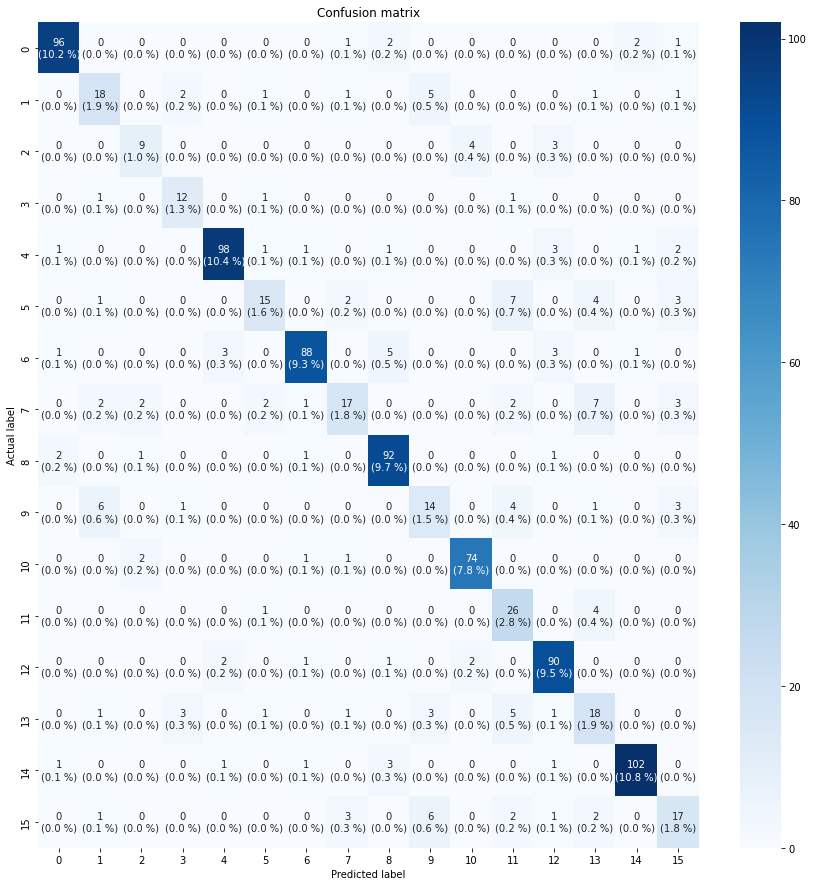

In [68]:
cnf_matrix4 = confusion_matrix(y_test, preddf4)

plt.figure(figsize=(12, 12))
group_counts = [f'{value:0.0f}' for value in cnf_matrix4.flatten()]
group_percentages = [f'{100 * value:0.1f} %' for value in 
                      cnf_matrix4.flatten()/np.sum(cnf_matrix4)]
labels = [f'{v1}\n({v2})' for v1, v2 in
          zip(group_counts,group_percentages)]
n = int(np.sqrt(len(labels)))
labels = np.asarray(labels).reshape(n,n)
sns.heatmap(cnf_matrix4, annot=labels, fmt='', cmap='Blues')

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Modelo 5 
El resultado es exactamente el mismo que el modelo 3 así que continuaremos con MaxPooling, añadiremos otro MaxPooling y dropout

In [69]:
model5 = Sequential()

model5.add(Conv1D(256, 5,padding='same',
                 input_shape=(167,1)))
model5.add(Activation('relu'))
model5.add(Conv1D(128, 5,padding='same'))
model5.add(Activation('relu'))
model5.add(Dropout(0.1))
model5.add(MaxPooling1D(pool_size=(8)))
model5.add(Conv1D(128, 5,padding='same',))
model5.add(Activation('relu'))
model5.add(Dropout(0.1))
model5.add(MaxPooling1D(pool_size=(8)))
model5.add(Conv1D(128, 5,padding='same',))
model5.add(Activation('relu'))
model5.add(Flatten())
model5.add(Dense(16))
model5.add(Activation('softmax'))
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=42,
                                              verbose=1)
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 167, 256)          1536      
                                                                 
 activation_20 (Activation)  (None, 167, 256)          0         
                                                                 
 conv1d_17 (Conv1D)          (None, 167, 128)          163968    
                                                                 
 activation_21 (Activation)  (None, 167, 128)          0         
                                                                 
 dropout_4 (Dropout)         (None, 167, 128)          0         
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 20, 128)          0         
 1D)                                                             
                                                      

In [70]:
model5.compile(loss='categorical_crossentropy', optimizer= 'rmsprop',metrics=['accuracy'])

In [71]:
cnnhistory5=model5.fit(X_traincnn, y_train1, batch_size=16, epochs=250, validation_data=(X_testcnn, y_test1), callbacks= [early_stop])

Epoch 1/250
236/236 [==============================] - 23s 93ms/step - loss: 2.2469 - accuracy: 0.3321 - val_loss: 1.2668 - val_accuracy: 0.5773
Epoch 2/250
236/236 [==============================] - 21s 91ms/step - loss: 1.1704 - accuracy: 0.6081 - val_loss: 0.9332 - val_accuracy: 0.6790
Epoch 3/250
236/236 [==============================] - 22s 93ms/step - loss: 0.9448 - accuracy: 0.6751 - val_loss: 0.9418 - val_accuracy: 0.6653
Epoch 4/250
236/236 [==============================] - 22s 92ms/step - loss: 0.8498 - accuracy: 0.7037 - val_loss: 0.7835 - val_accuracy: 0.7193
Epoch 5/250
236/236 [==============================] - 22s 94ms/step - loss: 0.7856 - accuracy: 0.7275 - val_loss: 0.8989 - val_accuracy: 0.7097
Epoch 6/250
236/236 [==============================] - 22s 93ms/step - loss: 0.7321 - accuracy: 0.7362 - val_loss: 0.6816 - val_accuracy: 0.7595
Epoch 7/250
236/236 [==============================] - 22s 93ms/step - loss: 0.6767 - accuracy: 0.7582 - val_loss: 0.7398 - val_ac

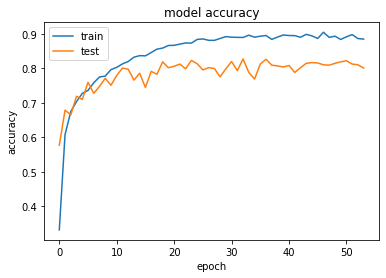

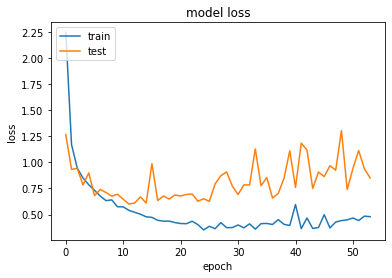

In [72]:
#Accuracy
plt.plot(cnnhistory5.history['accuracy'])
plt.plot(cnnhistory5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#Loss
plt.plot(cnnhistory5.history['loss'])
plt.plot(cnnhistory5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [73]:
#predicción 
y_pred5 = model5.predict(X_testcnn)
# Cambiamos los valores categoricos a los valores en nombre
preds5=y_pred5.argmax(axis=1)
abc = preds5.astype(int).flatten()
predictions5 = (lb.inverse_transform((abc)))

preddf5 = pd.DataFrame({'predictedvalues': predictions5})
preddf5

predictedvalues
0      fearful-female
1        happy-female
2           calm-male
3      neutral-female
4        happy-female
..                ...
939  surprised-female
940    surprised-male
941          sad-male
942  surprised-female
943      angry-female

[944 rows x 1 columns]

In [74]:
# Calculo accuracy con la predicción
accuracy5 = accuracy_score(y_true = y_test, y_pred = preddf5)

print('Accuracy: {:.2f}%'.format(accuracy5*100))

Accuracy: 80.08%


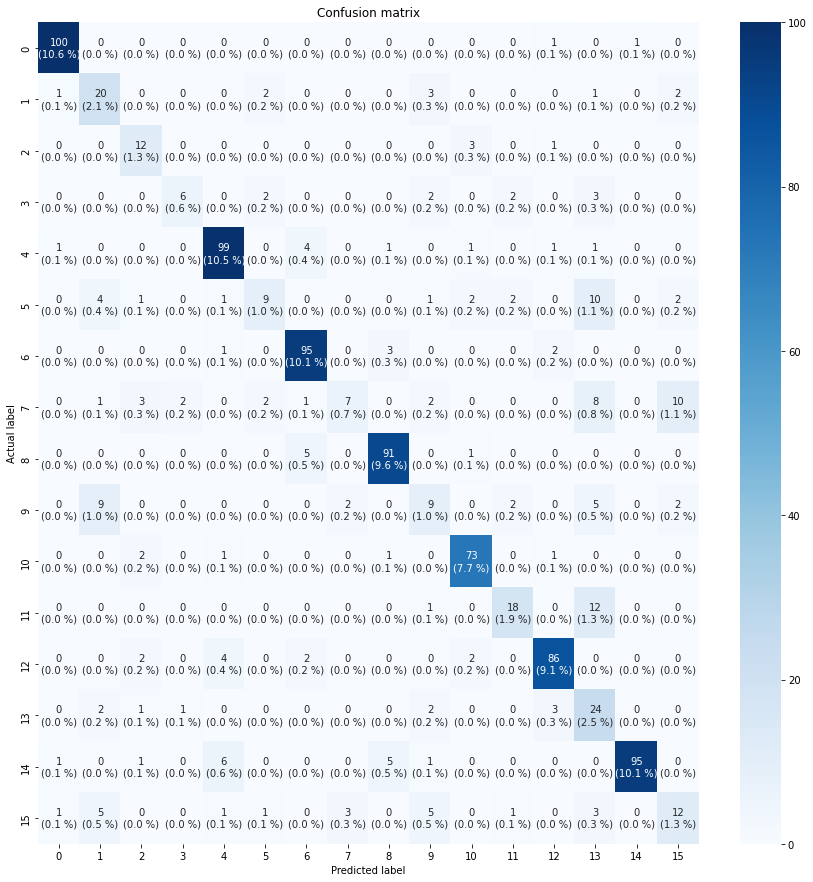

In [75]:
cnf_matrix5 = confusion_matrix(y_test, preddf5)

plt.figure(figsize=(12, 12))
group_counts = [f'{value:0.0f}' for value in cnf_matrix5.flatten()]
group_percentages = [f'{100 * value:0.1f} %' for value in 
                      cnf_matrix5.flatten()/np.sum(cnf_matrix5)]
labels = [f'{v1}\n({v2})' for v1, v2 in
          zip(group_counts,group_percentages)]
n = int(np.sqrt(len(labels)))
labels = np.asarray(labels).reshape(n,n)
sns.heatmap(cnf_matrix5, annot=labels, fmt='', cmap='Blues')

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Modelo 6

El accuracy de la predicción empeora, así que seguimos con el modelo 3. Cambiaremos los datos de las convoluciones.

In [76]:
model6 = Sequential()

model6.add(Conv1D(64, 10,padding='same',
                 input_shape=(167,1)))
model6.add(Activation('relu'))
model6.add(Conv1D(64, 10,padding='same'))
model6.add(Activation('relu'))
model6.add(Dropout(0.1))
model6.add(MaxPooling1D(pool_size=(8)))
model6.add(Conv1D(64, 10,padding='same',))
model6.add(Activation('relu'))
model6.add(Conv1D(64, 10,padding='same',))
model6.add(Activation('relu'))
model6.add(Flatten())
model6.add(Dense(16))
model6.add(Activation('softmax'))
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=42,
                                              verbose=1)
model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 167, 64)           704       
                                                                 
 activation_25 (Activation)  (None, 167, 64)           0         
                                                                 
 conv1d_21 (Conv1D)          (None, 167, 64)           41024     
                                                                 
 activation_26 (Activation)  (None, 167, 64)           0         
                                                                 
 dropout_6 (Dropout)         (None, 167, 64)           0         
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 20, 64)           0         
 1D)                                                             
                                                      

In [77]:
model6.compile(loss='categorical_crossentropy', optimizer= 'rmsprop',metrics=['accuracy'])

In [78]:
cnnhistory6=model6.fit(X_traincnn, y_train1, batch_size=16, epochs=250, validation_data=(X_testcnn, y_test1), callbacks= [early_stop])

Epoch 1/250
236/236 [==============================] - 10s 38ms/step - loss: 1.9109 - accuracy: 0.3761 - val_loss: 1.2328 - val_accuracy: 0.5752
Epoch 2/250
236/236 [==============================] - 9s 38ms/step - loss: 1.0820 - accuracy: 0.6155 - val_loss: 0.8902 - val_accuracy: 0.6706
Epoch 3/250
236/236 [==============================] - 9s 38ms/step - loss: 0.8804 - accuracy: 0.6899 - val_loss: 0.9003 - val_accuracy: 0.6822
Epoch 4/250
236/236 [==============================] - 9s 37ms/step - loss: 0.7857 - accuracy: 0.7193 - val_loss: 0.7970 - val_accuracy: 0.7023
Epoch 5/250
236/236 [==============================] - 9s 38ms/step - loss: 0.7122 - accuracy: 0.7463 - val_loss: 0.7019 - val_accuracy: 0.7309
Epoch 6/250
236/236 [==============================] - 9s 37ms/step - loss: 0.6711 - accuracy: 0.7524 - val_loss: 0.7212 - val_accuracy: 0.7309
Epoch 7/250
236/236 [==============================] - 9s 37ms/step - loss: 0.6311 - accuracy: 0.7725 - val_loss: 0.6875 - val_accuracy

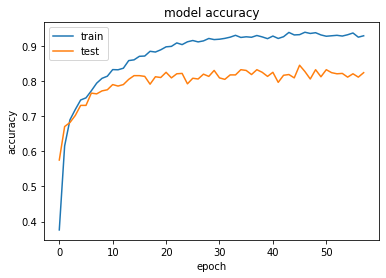

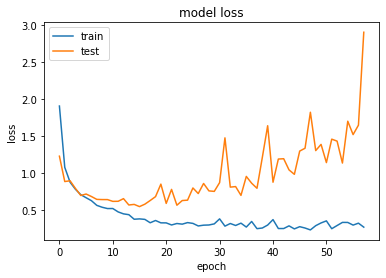

In [79]:
#Accuracy
plt.plot(cnnhistory6.history['accuracy'])
plt.plot(cnnhistory6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#Loss
plt.plot(cnnhistory6.history['loss'])
plt.plot(cnnhistory6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [80]:
#predicción 
y_pred6 = model6.predict(X_testcnn)
# Cambiamos los valores categoricos a los valores en nombre
preds6=y_pred6.argmax(axis=1)
abc = preds6.astype(int).flatten()
predictions6 = (lb.inverse_transform((abc)))

preddf6 = pd.DataFrame({'predictedvalues': predictions6})
preddf6

predictedvalues
0      fearful-female
1        happy-female
2        neutral-male
3         calm-female
4        happy-female
..                ...
939  surprised-female
940      neutral-male
941      disgust-male
942  surprised-female
943      angry-female

[944 rows x 1 columns]

In [81]:
# Calculo accuracy con la predicción
accuracy6 = accuracy_score(y_true = y_test, y_pred = preddf6)

print('Accuracy: {:.2f}%'.format(accuracy6*100))

Accuracy: 82.42%


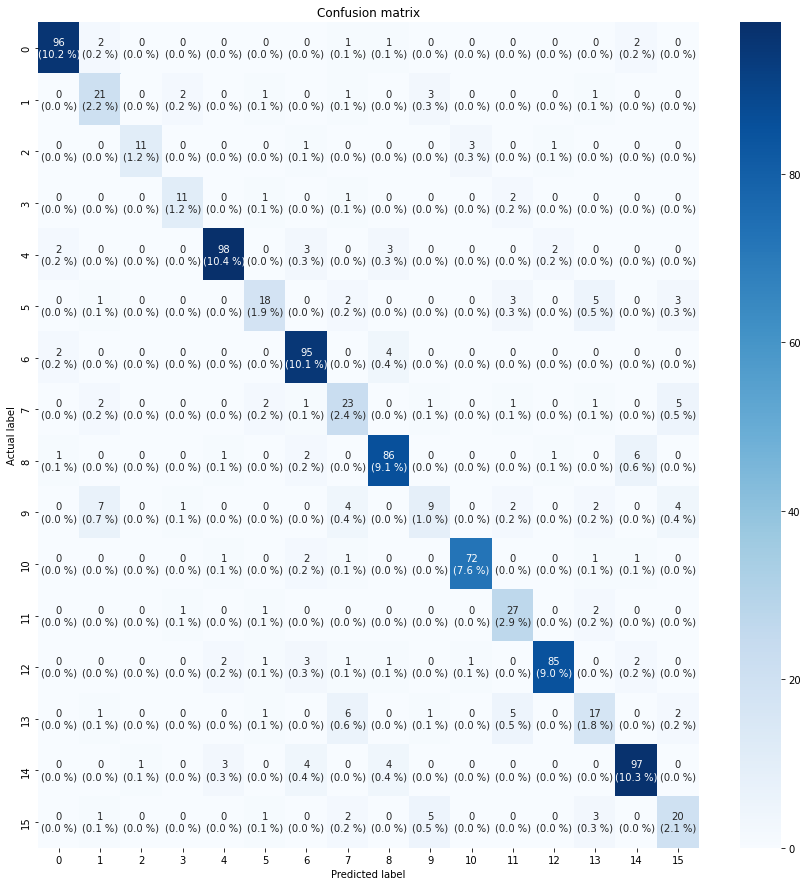

In [82]:
cnf_matrix6 = confusion_matrix(y_test, preddf3)

plt.figure(figsize=(12, 12))
group_counts = [f'{value:0.0f}' for value in cnf_matrix6.flatten()]
group_percentages = [f'{100 * value:0.1f} %' for value in 
                      cnf_matrix6.flatten()/np.sum(cnf_matrix6)]
labels = [f'{v1}\n({v2})' for v1, v2 in
          zip(group_counts,group_percentages)]
n = int(np.sqrt(len(labels)))
labels = np.asarray(labels).reshape(n,n)
sns.heatmap(cnf_matrix6, annot=labels, fmt='', cmap='Blues')

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Modelo7 

Empeora, así que vamos a probar a cambiar el batch size.

In [83]:
# Convolution Layer 1
model7.add(Conv1D(256, 5,padding='same',
                 input_shape=(167,1)))
model7.add(Activation('relu'))
# Convolution Layer 2
model7.add(Conv1D(128, 5,padding='same'))
model7.add(Activation('relu'))
# Regularización
model7.add(Dropout(0.1)) 
# Convolution + pooling Layer 3
model7.add(MaxPooling1D(pool_size=(8)))
model7.add(Conv1D(128, 5,padding='same',))
model7.add(Activation('relu'))
# Convolution Layer 4
model7.add(Conv1D(128, 5,padding='same',))
model7.add(Activation('relu'))
# Flattening
model7.add(Flatten())
# Fully-connected
model7.add(Dense(16))
model7.add(Activation('softmax'))
# Callback
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=42,
                                              verbose=1)
model7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_24 (Conv1D)          (None, 167, 256)          1536      
                                                                 
 activation_30 (Activation)  (None, 167, 256)          0         
                                                                 
 conv1d_25 (Conv1D)          (None, 167, 128)          163968    
                                                                 
 activation_31 (Activation)  (None, 167, 128)          0         
                                                                 
 dropout_7 (Dropout)         (None, 167, 128)          0         
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 20, 128)          0         
 1D)                                                             
                                                      

In [84]:
model7.compile(loss='categorical_crossentropy', optimizer= 'rmsprop',metrics=['accuracy'])

In [85]:
cnnhistory7=model7.fit(X_traincnn, y_train1, batch_size=64, epochs=250, validation_data=(X_testcnn, y_test1), callbacks= [early_stop])

Epoch 1/250
59/59 [==============================] - 21s 339ms/step - loss: 2.7831 - accuracy: 0.2161 - val_loss: 1.7574 - val_accuracy: 0.4110
Epoch 2/250
59/59 [==============================] - 20s 335ms/step - loss: 1.5279 - accuracy: 0.4915 - val_loss: 1.1889 - val_accuracy: 0.6123
Epoch 3/250
59/59 [==============================] - 20s 335ms/step - loss: 1.1051 - accuracy: 0.6266 - val_loss: 0.9717 - val_accuracy: 0.6716
Epoch 4/250
59/59 [==============================] - 20s 341ms/step - loss: 0.8997 - accuracy: 0.6872 - val_loss: 0.8783 - val_accuracy: 0.7044
Epoch 5/250
59/59 [==============================] - 20s 337ms/step - loss: 0.8089 - accuracy: 0.7174 - val_loss: 0.7765 - val_accuracy: 0.7299
Epoch 6/250
59/59 [==============================] - 20s 336ms/step - loss: 0.7212 - accuracy: 0.7397 - val_loss: 0.7219 - val_accuracy: 0.7405
Epoch 7/250
59/59 [==============================] - 20s 335ms/step - loss: 0.6338 - accuracy: 0.7696 - val_loss: 0.7120 - val_accuracy:

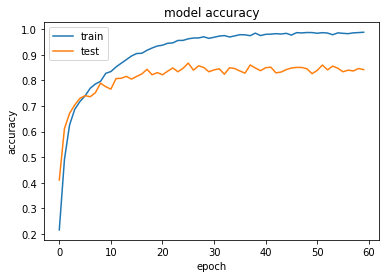

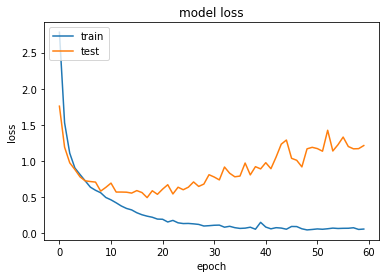

In [86]:
#Accuracy
plt.plot(cnnhistory7.history['accuracy'])
plt.plot(cnnhistory7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#Loss
plt.plot(cnnhistory7.history['loss'])
plt.plot(cnnhistory7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [87]:
#predicción 
y_pred7 = model7.predict(X_testcnn)
# Cambiamos los valores categoricos a los valores en nombre
preds7=y_pred7.argmax(axis=1)
abc = preds7.astype(int).flatten()
predictions7 = (lb.inverse_transform((abc)))

preddf7 = pd.DataFrame({'predictedvalues': predictions7})
preddf7

predictedvalues
0      fearful-female
1    surprised-female
2           calm-male
3         calm-female
4        happy-female
..                ...
939  surprised-female
940      neutral-male
941      fearful-male
942  surprised-female
943      angry-female

[944 rows x 1 columns]

In [88]:
# Calculo accuracy con la predicción
accuracy7 = accuracy_score(y_true = y_test, y_pred = preddf7)

print('Accuracy: {:.2f}%'.format(accuracy7*100))

Accuracy: 84.22%


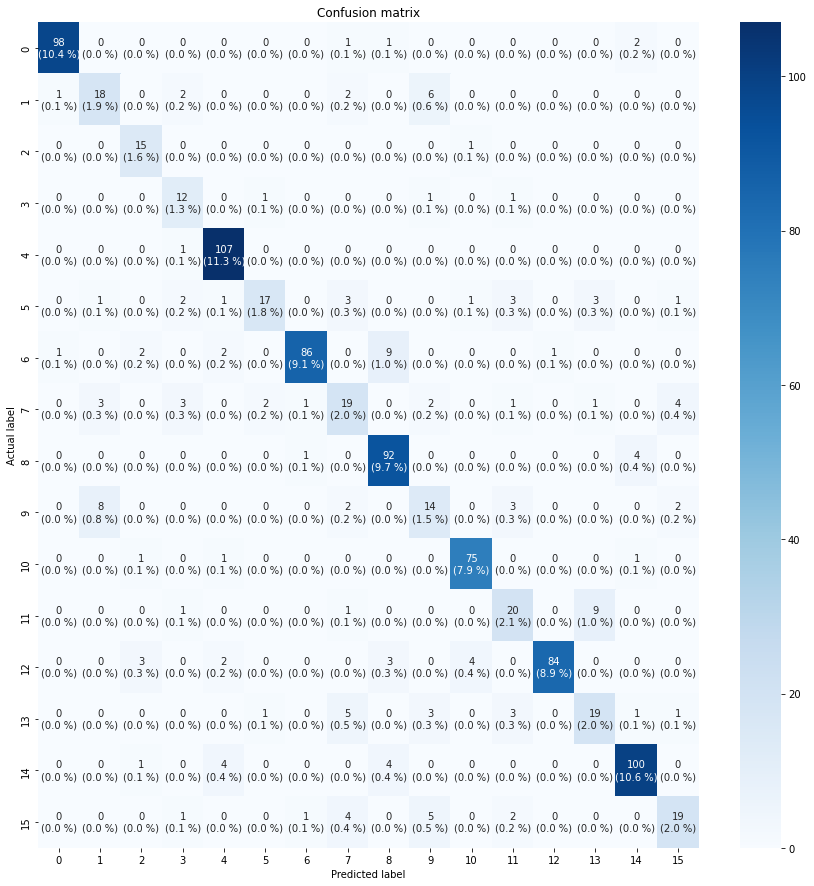

In [89]:
cnf_matrix7 = confusion_matrix(y_test, preddf7)

plt.figure(figsize=(12, 12))
group_counts = [f'{value:0.0f}' for value in cnf_matrix7.flatten()]
group_percentages = [f'{100 * value:0.1f} %' for value in 
                      cnf_matrix7.flatten()/np.sum(cnf_matrix7)]
labels = [f'{v1}\n({v2})' for v1, v2 in
          zip(group_counts,group_percentages)]
n = int(np.sqrt(len(labels)))
labels = np.asarray(labels).reshape(n,n)
sns.heatmap(cnf_matrix7, annot=labels, fmt='', cmap='Blues')

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Nos quedamos con el modelo 7, es el que mejor resultado da 84,22% de accuracy.

## Generamos varios audios y los probamos con el modelo escogido

In [111]:
# Guardamos modelo elegido

model_name = 'Reconocimiento_Modelo.h5'
save_dir = os.path.join('/gdrive/MyDrive/TFM/', 'modelo_guardado')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Modelo guardado del entrenamiento %s ' % model_path)



Modelo guardado del entrenamiento /gdrive/MyDrive/TFM/modelo_guardado/Reconocimiento_Modelo.h5 


In [112]:
import json
model_json = model7.to_json()
with open("model_json", "w") as json_file:
    json_file.write(model_json)

In [113]:
# Cargamos el archivo Json y creamos el modelo
from keras.models import model_from_json
json_file = open('model_json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('/gdrive/MyDrive/TFM/modelo_guardado/Reconocimiento_Modelo.h5')
print('Cargamos modelo')
 



Cargamos modelo


### Prueba 1 (mujer sorprendida)

In [169]:
filename = '/gdrive/MyDrive/TFM/Pruebas/audio1.wav'

IPython.display.Audio(filename)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


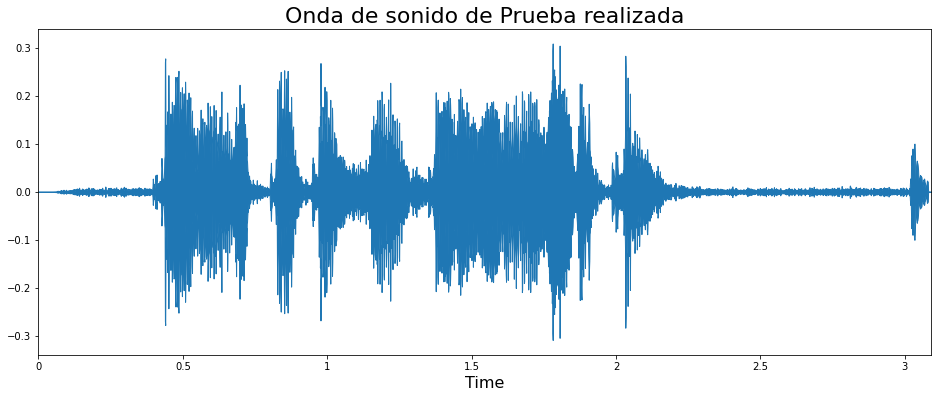

In [170]:
filename = '/gdrive/MyDrive/TFM/Pruebas/audio1.wav'
data, sampling_rate = librosa.load(filename, sr = 44100) 

# Gráfico

plt.figure(figsize=(16, 6))
plt.title(f'Onda de sonido de Prueba realizada', size = 22)
plt.xlabel('Time', size = 16)
librosa.display.waveplot(data, sr= sampling_rate)
plt.show()

In [171]:
# Cargamos y extraemos los datos del archivo de audio creado
prueba1 = []
data, sampling_rate = librosa.load(filename, sr = 44100, duration = 5)
features = extract_feature(filename, mfcc = True, chroma = True, mel = True, contrast = True)
prueba1.append(features)

prueba1 = pd.DataFrame(prueba1)
prueba1

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


0           1         2    ...        164        165        166
0 -369.260071  129.020828 -4.604225  ...  16.455616  18.684657  42.785893

[1 rows x 167 columns]

In [172]:
# Generamos una nueva dimension para utilizar el modelo

prueba1cnn = np.expand_dims(prueba1, axis=2)

In [173]:
# predecimos

prueba1_pred = loaded_model.predict(prueba1cnn, batch_size=16, verbose = 1)

prueba1_pred

1/1 [==============================] - 0s 22ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]],
      dtype=float32)

In [174]:
prueba1_pred1 = prueba1_pred.argmax(axis=1)
prueba1_abc = prueba1_pred1.astype(int).flatten()
prediccion1 = (lb.inverse_transform((prueba1_abc )))
prediccion1 

array(['surprised-male'], dtype='<U16')

La emoción la predice bien pero el genero no.

### Prueba 2 (hombre con disgustado)

In [126]:
filename2 = '/gdrive/MyDrive/TFM/Pruebas/audio4.wav'

IPython.display.Audio(filename2)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


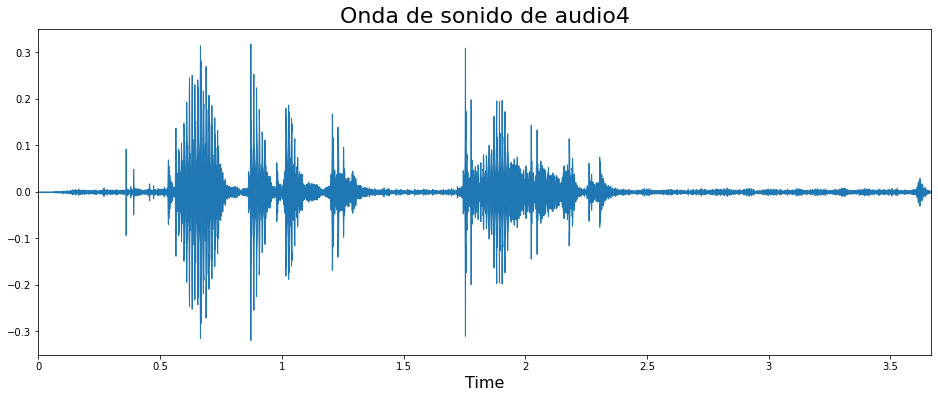

In [127]:
filename2 = '/gdrive/MyDrive/TFM/Pruebas/audio4.wav'
data, sampling_rate = librosa.load(filename2, sr = 44100) 

# Gráfico

plt.figure(figsize=(16, 6))
plt.title(f'Onda de sonido de audio4', size = 22)
plt.xlabel('Time', size = 16)
librosa.display.waveplot(data, sr= sampling_rate)
plt.show()

In [128]:
# Cargamos y extraemos los datos del archivo de audio creado
prueba2 = []
data, sampling_rate = librosa.load(filename2, sr = 44100, duration = 5)
features = extract_feature(filename2, mfcc = True, chroma = True, mel = True, contrast = True)
prueba2.append(features)

prueba2 = pd.DataFrame(prueba2)
prueba2

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


0           1         2    ...        164        165       166
0 -454.670258  137.694504  1.939484  ...  14.851059  18.808295  40.31996

[1 rows x 167 columns]

In [129]:
# Generamos una nueva dimension para utilizar el modelo

prueba2cnn = np.expand_dims(prueba2, axis=2)

In [130]:
# predecimos

prueba2_pred = loaded_model.predict(prueba2cnn, batch_size=16, verbose = 1)

prueba2_pred

1/1 [==============================] - 0s 25ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [131]:
prueba2_pred2 = prueba2_pred.argmax(axis=1)
prueba2_abc = prueba2_pred2.astype(int).flatten()
prediccion2 = (lb.inverse_transform((prueba2_abc )))
prediccion2 

array(['disgust-male'], dtype='<U16')

Lo predice bien.

 ### Prueba 3 (hombre con enfadado)

In [132]:
filename3 = '/gdrive/MyDrive/TFM/Pruebas/audio6.wav'

IPython.display.Audio(filename3)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


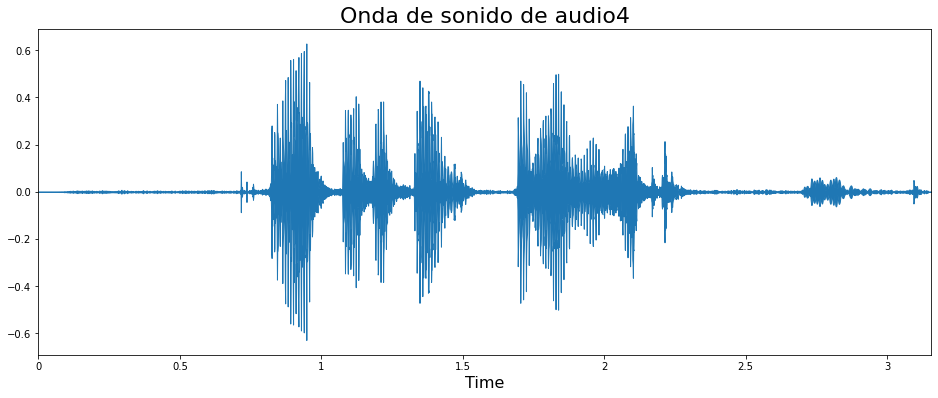

In [133]:
filename3 = '/gdrive/MyDrive/TFM/Pruebas/audio6.wav'
data, sampling_rate = librosa.load(filename3, sr = 44100) 

# Gráfico

plt.figure(figsize=(16, 6))
plt.title(f'Onda de sonido de audio4', size = 22)
plt.xlabel('Time', size = 16)
librosa.display.waveplot(data, sr= sampling_rate)
plt.show()

In [135]:
# Cargamos y extraemos los datos del archivo de audio creado
prueba3 = []
data, sampling_rate = librosa.load(filename3, sr = 44100, duration = 5)
features = extract_feature(filename3, mfcc = True, chroma = True, mel = True, contrast = True)
prueba3.append(features)

prueba3 = pd.DataFrame(prueba3)
prueba3

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


0           1         2    ...        164       165        166
0 -406.064911  130.618546 -0.924193  ...  14.697396  19.92603  40.388154

[1 rows x 167 columns]

In [136]:
# Generamos una nueva dimension para utilizar el modelo

prueba3cnn = np.expand_dims(prueba3, axis=2)

In [137]:
# predecimos

prueba3_pred = loaded_model.predict(prueba3cnn, batch_size=16, verbose = 1)

prueba3_pred

1/1 [==============================] - 0s 27ms/step


array([[0.0000000e+00, 5.8831918e-01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.1166666e-01,
        0.0000000e+00, 1.4149071e-05, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.9621890e-33, 0.0000000e+00, 0.0000000e+00]],
      dtype=float32)

In [138]:
prueba3_pred3 = prueba3_pred.argmax(axis=1)
prueba3_abc = prueba3_pred3.astype(int).flatten()
prediccion3 = (lb.inverse_transform((prueba3_abc )))
prediccion3

array(['angry-male'], dtype='<U16')

Predice bien.